In [1]:
# import required modules
import pandas as pd
import numpy as np

In [2]:
#pd.set_option('display.max_rows',None)
#pd.set_option('display.max_columns',None)

In [3]:
import warnings
warnings.filterwarnings("ignore")
#load the dataset
#Loading the train data
amx= pd.read_parquet('train_data.parquet')

In [4]:
#create random sampling
amx_1=amx.sample(n=500000)
t1=amx.sample(n=100000)
t2=amx.sample(n=100000)
t3=amx.sample(n=100000)
t4=amx.sample(n=100000)
t5=amx.sample(n=100000)

In [5]:
#check shape of data
amx_1.shape,t1.shape,t2.shape,t3.shape,t4.shape,t5.shape

((500000, 191),
 (100000, 191),
 (100000, 191),
 (100000, 191),
 (100000, 191),
 (100000, 191))

In [6]:
amx_samp=pd.concat([amx_1,t1,t2,t3,t4,t5],axis=0)

In [32]:
amx_samp.shape

(1000000, 191)

In [33]:
amx_samp.isnull().sum()

customer_ID         0
S_2                 0
P_2              8326
D_39                0
B_1                 0
                ...  
D_142          828843
D_143           18211
D_144            7407
D_145           18211
target              0
Length: 191, dtype: int64

In [8]:
amx_samp.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
4875659,e16dafc7b2222b26d3fec97f18a6740bf4bbde90a00824...,2018-03-06,-0.077341,1.207889,0.030752,0.203396,0.509321,0.133212,0.348033,0.078646,...,NaN,NaN,1.005937,0.001997,0.914213,0.354846,1.000728,0.360420,0.464051,1
880182,28ce0e2dfa60db731c154bad16304854a0bcb01d8c7bd3...,2017-06-30,0.191038,1.591970,0.443781,0.000191,0.508804,0.768357,0.443994,0.578241,...,NaN,NaN,0.003938,0.005328,0.002479,NaN,0.005495,0.001446,0.008153,1
2209790,661420da8584ac869d67375f85dc0e15f0345df13808ab...,2018-03-10,0.479501,0.038388,0.627087,0.011076,0.005160,0.170467,0.004827,0.273703,...,NaN,NaN,0.009105,0.007975,0.000912,NaN,0.004591,0.001747,0.004270,1
3487351,a1199cebdfdb434c7b5f37a642ad326ceb1826df3decc5...,2017-10-09,0.560677,0.001134,0.081446,0.045980,0.505707,0.163819,0.005737,0.424442,...,NaN,NaN,0.006028,0.006566,0.004075,NaN,0.006191,0.003095,0.006053,0
619880,1cda2ef7e30e872533a058875af4fea1c182e75266123d...,2017-07-22,0.487663,0.004903,0.008910,1.002129,0.000048,0.101695,0.008984,0.010305,...,NaN,NaN,0.006420,0.008708,0.008580,NaN,0.003279,0.003722,0.007445,0


In [17]:
#sort values by ["customer_ID","S_2"] and fill missing values
sort=amx_samp.sort_values(["customer_ID","S_2"])
sort["D_64"]=sort["D_64"].ffill().bfill()

sort1=pd.concat([sort,pd.get_dummies(sort[["D_63","D_64"]],drop_first=True)],axis=1)
df1=pd.concat([sort1.loc[sort1["target"]==0].groupby("customer_ID").median(),sort1.loc[sort1["target"]==1].groupby("customer_ID").median()],axis=0,ignore_index=True)

In [18]:
#fill missing values
df1=df1.ffill().bfill()

In [12]:
sort[["D_63","D_64"]].isnull().sum()

D_63    0
D_64    0
dtype: int64

In [13]:
#check shape
df1.shape

(399928, 195)

In [22]:
y=df1["target"]
X=df1.drop("target",axis=1)

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model5=rfc.fit(X,y)
pred1=model5.predict(xt1)
pred2=model5.predict(xt2)
pred3=model5.predict(xt3)
pred4=model5.predict(xt4)
pred5=model5.predict(xt5)
from sklearn.metrics import f1_score,classification_report, accuracy_score
#print("accuracy score",accuracy_score(ytest,pred))
print("f1 score1",f1_score(yt1,pred1))
print("f1 score2",f1_score(yt2,pred2))
print("f1 score3",f1_score(yt3,pred3))
print("f1 score4",f1_score(yt4,pred4))
print("f1 score5",f1_score(yt5,pred5))

In [24]:
d0=sort.loc[sort["target"]==0][["customer_ID","D_63","D_64"]].ffill().bfill()
d0[d0.duplicated()].shape

(411891, 3)

In [25]:
d1=sort.loc[sort["target"]==1][["customer_ID","D_63","D_64"]].ffill().bfill()
d1[d1.duplicated()].shape

(129800, 3)

In [26]:
amx_samp.select_dtypes(include=[np.object]).head()

,customer_ID,S_2,D_63,D_64
4875659,e16dafc7b2222b26d3fec97f18a6740bf4bbde90a00824...,2018-03-06,CR,O
880182,28ce0e2dfa60db731c154bad16304854a0bcb01d8c7bd3...,2017-06-30,CO,R
2209790,661420da8584ac869d67375f85dc0e15f0345df13808ab...,2018-03-10,CO,R
3487351,a1199cebdfdb434c7b5f37a642ad326ceb1826df3decc5...,2017-10-09,CL,O
619880,1cda2ef7e30e872533a058875af4fea1c182e75266123d...,2017-07-22,CO,O


In [27]:
#extract categorical features in (categ) variable
categ=[]
for i in amx_samp:
    if len(amx_samp[i].value_counts())<20:
        categ.append(i)
amx_samp[categ].head()

,D_63,D_64,D_66,D_68,B_30,D_87,B_31,B_38,D_114,D_116,D_117,D_120,D_126,target
4875659,CR,O,NaN,3.0,0.0,NaN,1,3.0,1.0,0.0,4.0,0.0,0.0,1
880182,CO,R,NaN,5.0,1.0,NaN,1,4.0,1.0,0.0,-1.0,0.0,1.0,1
2209790,CO,R,NaN,5.0,1.0,NaN,1,4.0,1.0,0.0,-1.0,1.0,1.0,1
3487351,CL,O,NaN,6.0,1.0,NaN,1,5.0,1.0,0.0,2.0,0.0,1.0,0
619880,CO,O,NaN,5.0,0.0,NaN,1,3.0,1.0,0.0,4.0,0.0,1.0,0


In [28]:
categ=['D_63',
 'D_64',
 'D_66',
 'D_68',
 'B_30',
 'D_87',
 'B_31',
 'B_38',
 'D_114',
 'D_116',
 'D_117',
 'D_120',
 'D_126',
 'target','customer_ID','S_2']
categ

['D_63',
 'D_64',
 'D_66',
 'D_68',
 'B_30',
 'D_87',
 'B_31',
 'B_38',
 'D_114',
 'D_116',
 'D_117',
 'D_120',
 'D_126',
 'target',
 'customer_ID',
 'S_2']

In [10]:
amx_samp.loc[amx_samp["target"]==1].drop(categ,axis=1)
for i in amx_samp["customer_ID"].head():
    print(i)
amx_samp.loc[amx_samp["customer_ID"]=="49b216f293b7aadc8df250b940624d67a34eab263f00f8202ff3eea3f5552e11"].sort_values("S_2")
#We can see that values will naturally be similar for individual customers and they are likely to correspond to previous
# values when sorted based on transaction date and thus after re arranging data ffill bfill maybe best imputation method.


ac5afdca1c78b90056dae927cddb72767490f3aba06df064c23b4582e99ba1f3
da15691961619da3ff61c4a8276309ceeff426a0dd6ec31c411bf9f678209e23
bc43012511ac158f05b1083926cb102edc31422eca2a2270bfeec2efb7f895f5
2cb71eb386d3145361b95ae41b37e04d647a1273e1ebf2483d9ec57595f113d8
76e6b2ab7a59b1c9f63ba53a115cadb65d1785e3b5177df51aa6b750a215719a


,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
1600551,49b216f293b7aadc8df250b940624d67a34eab263f00f8...,2018-01-30,0.61546,0.007991,0.002838,0.81365,0.006236,NaN,0.006848,0.00444,...,NaN,NaN,NaN,0.004516,NaN,NaN,NaN,0.003015,NaN,0


In [35]:
#Arranging data and missing value imputation
df=amx_samp.sort_values(["customer_ID","S_2"]).ffill().bfill()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,0.006179,0.004037,0.003269,0.007329,0.000427,0.161635,0.003429,0.006986,0.002603,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,0.006179,0.004037,0.003269,0.007329,0.000427,0.161635,0.003429,0.006986,0.002603,0
5,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-08-04,0.945964,0.001746,0.007863,1.005006,0.004220,0.110946,0.009857,0.009866,...,0.006179,0.004037,0.001924,0.008598,0.004529,0.161635,0.000674,0.002223,0.002884,0
10,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-01-11,0.909811,0.005715,0.002829,1.004798,0.008175,0.098882,0.001853,0.003238,...,0.006179,0.004037,0.000427,0.004594,0.003613,0.161635,0.007568,0.003004,0.006362,0
15,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2017-05-07,0.922563,0.567403,0.033713,1.007497,0.005594,0.094655,0.003162,0.010466,...,0.006179,0.004037,0.007742,0.002693,0.009851,0.161635,0.000996,0.003254,0.004469,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531422,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,2018-01-11,0.794548,0.384731,0.027101,1.001420,0.005396,0.075824,0.000377,0.004891,...,0.000503,0.006287,0.002530,0.000498,0.003150,0.387562,0.007441,0.004904,0.002929,0
5531424,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,2018-03-07,0.800522,0.267018,0.020563,1.007023,0.000957,0.066648,0.007424,0.006314,...,0.000503,0.006287,0.006035,0.002869,0.002149,0.387562,0.008031,0.000340,0.002148,0
5531425,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2017-03-25,0.856981,0.001748,0.003494,1.005970,0.005690,0.369159,0.008973,0.095409,...,0.000503,0.006287,1.008323,0.004899,0.931233,0.393216,1.008729,0.006343,0.183736,1
5531432,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2017-10-22,0.791680,0.002767,0.025240,1.004200,0.009835,0.379471,0.006601,0.095549,...,0.000503,0.006287,1.007182,0.009557,0.939742,0.424473,1.007567,0.001186,0.183905,1


In [34]:
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,0.006179,0.004037,0.003269,0.007329,0.000427,0.161635,0.003429,0.006986,0.002603,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,0.006179,0.004037,0.003269,0.007329,0.000427,0.161635,0.003429,0.006986,0.002603,0
5,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-08-04,0.945964,0.001746,0.007863,1.005006,0.004220,0.110946,0.009857,0.009866,...,0.006179,0.004037,0.001924,0.008598,0.004529,0.161635,0.000674,0.002223,0.002884,0
10,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-01-11,0.909811,0.005715,0.002829,1.004798,0.008175,0.098882,0.001853,0.003238,...,0.006179,0.004037,0.000427,0.004594,0.003613,0.161635,0.007568,0.003004,0.006362,0
15,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2017-05-07,0.922563,0.567403,0.033713,1.007497,0.005594,0.094655,0.003162,0.010466,...,0.006179,0.004037,0.007742,0.002693,0.009851,0.161635,0.000996,0.003254,0.004469,0


In [12]:
df.loc[df.target==1].select_dtypes(include="object")["D_64"].value_counts()
# Cant give bias based on D_63 /D_64 since the sub categories are similarly distributed in case of defaulter/non defaulters
# so convert them to dummies atleast the information will be saved.

U     99433
O     97561
R     50689
-1     1823
Name: D_64, dtype: int64

In [14]:
# Doesnt seem as if these are really outliers seeing their range

In [30]:
obj=df.select_dtypes(include="object")
df_cat=pd.get_dummies(df[["D_63","D_64"]],drop_first=True)
df_num=df.drop(obj,axis=1)
df_final=pd.concat([df_num,df_cat],axis=1)

In [ ]:
df_final.head()
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm
anova_drop=[]
for i in df_final.columns:
    if i not in categ:
        model_an = sfa.ols("df_final[i]~target", data = df_final).fit()
        if model_an.pvalues>0.01:
            anova_drop.append(i)
# 0.10 pe 10 columns to drop, 0.01 pe 13 columns

In [109]:
model_an.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 D_64_U   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 04 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:23:58   Log-Likelihood:            -6.1443e+05
No. Observations:             1000000   AIC:                         1.229e+06
Df Residuals:                  999998   BIC:                         1.229e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2488      0.001    481.915      0.000       0.248       0.250
target         0.1497      0.001    144.809      0.000       0.148       0.152
==============================================================================
Omnibus:                   394012.063   Durbin-Watson:                   0.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           187151.388
Skew:                           0.923   Prob(JB):                         0.00
Kurtosis:                       1.959   Cond. No.                         2.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
#for i in df_final[anova_drop]:
#    print(i,df_final[anova_drop][i].var())
len(anova_drop)

13

In [106]:
anova_drop

['D_49',
 'D_73',
 'D_88',
 'D_106',
 'D_110',
 'D_111',
 'B_39',
 'B_42',
 'D_134',
 'D_135',
 'D_137',
 'D_138',
 'D_63_XM']

In [88]:
train=df_final.iloc[:500000,:]
test1=df_final.iloc[500000:600000,:]
test2=df_final.iloc[600000:700000,:]
test3=df_final.iloc[700000:800000,:]
test4=df_final.iloc[800000:900000,:]
test5=df_final.iloc[900000:1000000,:]

In [19]:
xtrain=train.drop("target",axis=1)
ytrain=train["target"]
xt1=test1.drop("target",axis=1)
yt1=test1["target"]
xt2=test2.drop("target",axis=1)
yt2=test2["target"]
xt3=test3.drop("target",axis=1)
yt3=test3["target"]
xt4=test4.drop("target",axis=1)
yt4=test4["target"]
xt5=test5.drop("target",axis=1)
yt5=test5["target"]

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=1)
xtrain_lda=lda.fit_transform(xtrain,ytrain)
xt1_lda=lda.transform(xt1)
xt2_lda=lda.transform(xt2)
xt3_lda=lda.transform(xt3)
xt4_lda=lda.transform(xt4)
xt5_lda=lda.transform(xt5)


In [ ]:
#X=amx_samp.drop("target",axis=1)
#y=amx_samp["target"]
#from sklearn.model_selection import train_test_split
#xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=10)
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=500)
model=log.fit(xtrain_lda,ytrain)
pred1=model.predict(xt1_lda)
pred2=model.predict(xt2_lda)
pred3=model.predict(xt3_lda)
pred4=model.predict(xt4_lda)
pred5=model.predict(xt5_lda)
from sklearn.metrics import f1_score,classification_report, accuracy_score
#print("accuracy score",accuracy_score(ytest,pred))
print("f1 score1",f1_score(yt1,pred1))
print("f1 score2",f1_score(yt2,pred2))
print("f1 score3",f1_score(yt3,pred3))
print("f1 score4",f1_score(yt4,pred4))
print("f1 score5",f1_score(yt5,pred5))
#print("classification report",classification_report(ytest,pred))

#f1 score1 0.708376356548309
#f1 score2 0.7055648811168008
#f1 score3 0.7064084715014978
#f1 score4 0.7099032586558045
#f1 score5 0.7077046957111375

In [44]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=500)
model=log.fit(xtrain,ytrain)
pred1=model.predict(xt1)
pred2=model.predict(xt2)
pred3=model.predict(xt3)
pred4=model.predict(xt4)
pred5=model.predict(xt5)
from sklearn.metrics import f1_score,classification_report, accuracy_score
#print("accuracy score",accuracy_score(ytest,pred))
print("f1 score1",f1_score(yt1,pred1))
print("f1 score2",f1_score(yt2,pred2))
print("f1 score3",f1_score(yt3,pred3))
print("f1 score4",f1_score(yt4,pred4))
print("f1 score5",f1_score(yt5,pred5))
#print("classification report",classification_report(ytest,pred))

f1 score1 0.7186815962283212
f1 score2 0.7162262707000276
f1 score3 0.7140321253842492
f1 score4 0.7228089367610553
f1 score5 0.7141078481882192


In [46]:
#Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
model2=gnb.fit(xtrain_lda,ytrain)
pred1=model2.predict(xt1_lda)
pred2=model2.predict(xt2_lda)
pred3=model2.predict(xt3_lda)
pred4=model2.predict(xt4_lda)
pred5=model2.predict(xt5_lda)
from sklearn.metrics import f1_score,classification_report, accuracy_score
#print("accuracy score",accuracy_score(ytest,pred))
print("f1 score1",f1_score(yt1,pred1))
print("f1 score2",f1_score(yt2,pred2))
print("f1 score3",f1_score(yt3,pred3))
print("f1 score4",f1_score(yt4,pred4))
print("f1 score5",f1_score(yt5,pred5))
#print("classification report",classification_report(ytest,pred))

#f1 score1 0.7100557122222986
#f1 score2 0.7088541847016863
#f1 score3 0.7095274980635166
#f1 score4 0.7078073866292659
#f1 score5 0.7095657591858633

f1 score1 0.7289077828646174
f1 score2 0.7288681504728083
f1 score3 0.7258583352606018
f1 score4 0.7318926426733118
f1 score5 0.72559614461853


In [48]:
#SGD classifier

from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
model3=sgd.fit(xtrain_lda,ytrain)
pred1=model3.predict(xt1_lda)
pred2=model3.predict(xt2_lda)
pred3=model3.predict(xt3_lda)
pred4=model3.predict(xt4_lda)
pred5=model3.predict(xt5_lda)
from sklearn.metrics import f1_score,classification_report, accuracy_score
#print("accuracy score",accuracy_score(ytest,pred))
print("f1 score1",f1_score(yt1,pred1))
print("f1 score2",f1_score(yt2,pred2))
print("f1 score3",f1_score(yt3,pred3))
print("f1 score4",f1_score(yt4,pred4))
print("f1 score5",f1_score(yt5,pred5))
#print("classification report",classification_report(ytest,pred))

#f1 score1 0.6854309720729219
#f1 score2 0.6843173594563586
#f1 score3 0.6845416876767588
#f1 score4 0.6873236953455572
#f1 score5 0.6843634442683572

f1 score1 0.7336671242832915
f1 score2 0.7336402901149052
f1 score3 0.7306432214987766
f1 score4 0.7346823377357727
f1 score5 0.7286658839522956


In [66]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree=DecisionTreeClassifier(random_state=10)
tree.fit(xtrain,ytrain)
p1=tree.predict(xt1)
p2=tree.predict(xt2)
p3=tree.predict(xt3)
p4=tree.predict(xt4)
p5=tree.predict(xt5)
print(accuracy_score(yt1,p1))
print(accuracy_score(yt2,p2))
print(accuracy_score(yt3,p3))
print(accuracy_score(yt4,p4))
print(accuracy_score(yt5,p5))

0.81099
0.81192
0.812
0.81201
0.81303


In [67]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model5=rf.fit(xtrain,ytrain)
pred1=model5.predict(xt1)
pred2=model5.predict(xt2)
pred3=model5.predict(xt3)
pred4=model5.predict(xt4)
pred5=model5.predict(xt5)
from sklearn.metrics import f1_score,classification_report, accuracy_score
#print("accuracy score",accuracy_score(ytest,pred))
print("f1 score1",f1_score(yt1,pred1))
print("f1 score2",f1_score(yt2,pred2))
print("f1 score3",f1_score(yt3,pred3))
print("f1 score4",f1_score(yt4,pred4))
print("f1 score5",f1_score(yt5,pred5))
#print("classification report",classification_report(ytest,pred))

#f1 score1 0.7475657908337295
#f1 score2 0.7501380735164768
#f1 score3 0.7495251904343742
#f1 score4 0.7515404656548529
#f1 score5 0.7497940352611633



f1 score1 0.733779494126448
f1 score2 0.7319359724894583
f1 score3 0.7325084084208777
f1 score4 0.7357800020220402
f1 score5 0.7317012756471122


In [51]:
# XGBoost

from xgboost import XGBClassifier
xgb = XGBClassifier()
model7=xgb.fit(xtrain_lda,ytrain)
pred1=model7.predict(xt1_lda)
pred2=model7.predict(xt2_lda)
pred3=model7.predict(xt3_lda)
pred4=model7.predict(xt4_lda)
pred5=model7.predict(xt5_lda)
from sklearn.metrics import f1_score,classification_report, accuracy_score
#print("accuracy score",accuracy_score(ytest,pred))
print("f1 score1",f1_score(yt1,pred1))
print("f1 score2",f1_score(yt2,pred2))
print("f1 score3",f1_score(yt3,pred3))
print("f1 score4",f1_score(yt4,pred4))
print("f1 score5",f1_score(yt5,pred5))
#print("classification report",classification_report(ytest,pred))

#f1 score1 0.7380570174547375
#f1 score2 0.7362520021356113
#f1 score3 0.7399008371941803
#f1 score4 0.7446739962144094
#f1 score5 0.739047235371135

f1 score1 0.7356220598538685
f1 score2 0.7343127942929895
f1 score3 0.7325461801127249
f1 score4 0.736936936936937
f1 score5 0.7305814832213394


In [64]:
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [65]:
from sklearn.ensemble import StackingClassifier
Classifiers = [('1.CatBoost' ,CatBoostClassifier()),('2.AdaBoost' , AdaBoostClassifier()),('3.XGBoost' , XGBClassifier())]
st=StackingClassifier(estimators=Classifiers)
modelst=st.fit(xtrain_lda,ytrain)
pred1=modelst.predict(xt1_lda)
pred2=modelst.predict(xt2_lda)
pred3=modelst.predict(xt3_lda)
pred4=modelst.predict(xt4_lda)
pred5=modelst.predict(xt5_lda)
from sklearn.metrics import f1_score,classification_report, accuracy_score
#print("accuracy score",accuracy_score(ytest,pred))
print("f1 score1",f1_score(yt1,pred1))
print("f1 score2",f1_score(yt2,pred2))
print("f1 score3",f1_score(yt3,pred3))
print("f1 score4",f1_score(yt4,pred4))
print("f1 score5",f1_score(yt5,pred5))

#f1 score1 0.7329217608844772
#f1 score2 0.732354740061162
#f1 score3 0.7302298564434486
#f1 score4 0.7356785541390995
#f1 score5 0.7291988705455595

Learning rate set to 0.146351
0:	learn: 0.5373149	total: 129ms	remaining: 2m 8s
1:	learn: 0.4426153	total: 211ms	remaining: 1m 45s
2:	learn: 0.3862141	total: 286ms	remaining: 1m 35s
3:	learn: 0.3532480	total: 347ms	remaining: 1m 26s
4:	learn: 0.3312359	total: 408ms	remaining: 1m 21s
5:	learn: 0.3194219	total: 502ms	remaining: 1m 23s
6:	learn: 0.3099306	total: 565ms	remaining: 1m 20s
7:	learn: 0.3030463	total: 627ms	remaining: 1m 17s
8:	learn: 0.2994074	total: 688ms	remaining: 1m 15s
9:	learn: 0.2959789	total: 775ms	remaining: 1m 16s
10:	learn: 0.2939185	total: 847ms	remaining: 1m 16s
11:	learn: 0.2920454	total: 907ms	remaining: 1m 14s
12:	learn: 0.2907575	total: 968ms	remaining: 1m 13s
13:	learn: 0.2902910	total: 1.06s	remaining: 1m 14s
14:	learn: 0.2894418	total: 1.13s	remaining: 1m 14s
15:	learn: 0.2888598	total: 1.19s	remaining: 1m 13s
16:	learn: 0.2885705	total: 1.25s	remaining: 1m 12s
17:	learn: 0.2882478	total: 1.33s	remaining: 1m 12s
18:	learn: 0.2879917	total: 1.4s	remaining: 1

158:	learn: 0.2870248	total: 13.2s	remaining: 1m 9s
159:	learn: 0.2870212	total: 13.2s	remaining: 1m 9s
160:	learn: 0.2870279	total: 13.3s	remaining: 1m 9s
161:	learn: 0.2870310	total: 13.4s	remaining: 1m 9s
162:	learn: 0.2870279	total: 13.5s	remaining: 1m 9s
163:	learn: 0.2870283	total: 13.6s	remaining: 1m 9s
164:	learn: 0.2870276	total: 13.7s	remaining: 1m 9s
165:	learn: 0.2870285	total: 13.8s	remaining: 1m 9s
166:	learn: 0.2870255	total: 14s	remaining: 1m 9s
167:	learn: 0.2870248	total: 14.1s	remaining: 1m 9s
168:	learn: 0.2870236	total: 14.2s	remaining: 1m 9s
169:	learn: 0.2870198	total: 14.3s	remaining: 1m 9s
170:	learn: 0.2870158	total: 14.4s	remaining: 1m 9s
171:	learn: 0.2870156	total: 14.5s	remaining: 1m 9s
172:	learn: 0.2870140	total: 14.6s	remaining: 1m 9s
173:	learn: 0.2870125	total: 14.7s	remaining: 1m 9s
174:	learn: 0.2870108	total: 14.8s	remaining: 1m 9s
175:	learn: 0.2870117	total: 14.9s	remaining: 1m 9s
176:	learn: 0.2870067	total: 15s	remaining: 1m 9s
177:	learn: 0.28

318:	learn: 0.2869119	total: 24.3s	remaining: 51.8s
319:	learn: 0.2869102	total: 24.3s	remaining: 51.7s
320:	learn: 0.2869110	total: 24.4s	remaining: 51.5s
321:	learn: 0.2869111	total: 24.4s	remaining: 51.4s
322:	learn: 0.2869108	total: 24.5s	remaining: 51.3s
323:	learn: 0.2869107	total: 24.6s	remaining: 51.3s
324:	learn: 0.2869099	total: 24.7s	remaining: 51.2s
325:	learn: 0.2869098	total: 24.8s	remaining: 51.2s
326:	learn: 0.2869111	total: 24.8s	remaining: 51s
327:	learn: 0.2869111	total: 24.9s	remaining: 50.9s
328:	learn: 0.2869085	total: 24.9s	remaining: 50.8s
329:	learn: 0.2869083	total: 25s	remaining: 50.7s
330:	learn: 0.2869073	total: 25.1s	remaining: 50.8s
331:	learn: 0.2869084	total: 25.3s	remaining: 50.9s
332:	learn: 0.2869058	total: 25.4s	remaining: 50.8s
333:	learn: 0.2869047	total: 25.5s	remaining: 50.8s
334:	learn: 0.2869048	total: 25.6s	remaining: 50.8s
335:	learn: 0.2869047	total: 25.7s	remaining: 50.8s
336:	learn: 0.2869054	total: 25.8s	remaining: 50.8s
337:	learn: 0.28

478:	learn: 0.2868835	total: 35.2s	remaining: 38.3s
479:	learn: 0.2868804	total: 35.3s	remaining: 38.2s
480:	learn: 0.2868804	total: 35.3s	remaining: 38.1s
481:	learn: 0.2868822	total: 35.4s	remaining: 38.1s
482:	learn: 0.2868794	total: 35.5s	remaining: 38s
483:	learn: 0.2868781	total: 35.6s	remaining: 37.9s
484:	learn: 0.2868777	total: 35.6s	remaining: 37.9s
485:	learn: 0.2868769	total: 35.7s	remaining: 37.8s
486:	learn: 0.2868774	total: 35.8s	remaining: 37.7s
487:	learn: 0.2868762	total: 35.9s	remaining: 37.6s
488:	learn: 0.2868759	total: 35.9s	remaining: 37.5s
489:	learn: 0.2868756	total: 36s	remaining: 37.5s
490:	learn: 0.2868756	total: 36.1s	remaining: 37.4s
491:	learn: 0.2868769	total: 36.1s	remaining: 37.3s
492:	learn: 0.2868774	total: 36.2s	remaining: 37.2s
493:	learn: 0.2868772	total: 36.2s	remaining: 37.1s
494:	learn: 0.2868746	total: 36.3s	remaining: 37.1s
495:	learn: 0.2868755	total: 36.4s	remaining: 37s
496:	learn: 0.2868760	total: 36.5s	remaining: 36.9s
497:	learn: 0.2868

640:	learn: 0.2868701	total: 44.9s	remaining: 25.1s
641:	learn: 0.2868700	total: 45s	remaining: 25.1s
642:	learn: 0.2868697	total: 45s	remaining: 25s
643:	learn: 0.2868697	total: 45.1s	remaining: 24.9s
644:	learn: 0.2868698	total: 45.1s	remaining: 24.8s
645:	learn: 0.2868697	total: 45.2s	remaining: 24.8s
646:	learn: 0.2868709	total: 45.2s	remaining: 24.7s
647:	learn: 0.2868700	total: 45.3s	remaining: 24.6s
648:	learn: 0.2868700	total: 45.3s	remaining: 24.5s
649:	learn: 0.2868700	total: 45.4s	remaining: 24.4s
650:	learn: 0.2868698	total: 45.4s	remaining: 24.4s
651:	learn: 0.2868706	total: 45.5s	remaining: 24.3s
652:	learn: 0.2868715	total: 45.6s	remaining: 24.2s
653:	learn: 0.2868702	total: 45.6s	remaining: 24.1s
654:	learn: 0.2868711	total: 45.7s	remaining: 24.1s
655:	learn: 0.2868713	total: 45.7s	remaining: 24s
656:	learn: 0.2868717	total: 45.8s	remaining: 23.9s
657:	learn: 0.2868714	total: 45.8s	remaining: 23.8s
658:	learn: 0.2868702	total: 45.9s	remaining: 23.7s
659:	learn: 0.286871

800:	learn: 0.2868645	total: 58.3s	remaining: 14.5s
801:	learn: 0.2868646	total: 58.4s	remaining: 14.4s
802:	learn: 0.2868646	total: 58.4s	remaining: 14.3s
803:	learn: 0.2868646	total: 58.5s	remaining: 14.2s
804:	learn: 0.2868643	total: 58.5s	remaining: 14.2s
805:	learn: 0.2868634	total: 58.6s	remaining: 14.1s
806:	learn: 0.2868626	total: 58.6s	remaining: 14s
807:	learn: 0.2868631	total: 58.7s	remaining: 13.9s
808:	learn: 0.2868635	total: 58.7s	remaining: 13.9s
809:	learn: 0.2868633	total: 58.8s	remaining: 13.8s
810:	learn: 0.2868640	total: 58.9s	remaining: 13.7s
811:	learn: 0.2868639	total: 59s	remaining: 13.7s
812:	learn: 0.2868639	total: 59.1s	remaining: 13.6s
813:	learn: 0.2868627	total: 59.2s	remaining: 13.5s
814:	learn: 0.2868621	total: 59.4s	remaining: 13.5s
815:	learn: 0.2868621	total: 59.5s	remaining: 13.4s
816:	learn: 0.2868621	total: 59.5s	remaining: 13.3s
817:	learn: 0.2868631	total: 59.6s	remaining: 13.3s
818:	learn: 0.2868631	total: 59.7s	remaining: 13.2s
819:	learn: 0.28

961:	learn: 0.2868673	total: 1m 12s	remaining: 2.88s
962:	learn: 0.2868670	total: 1m 12s	remaining: 2.8s
963:	learn: 0.2868670	total: 1m 12s	remaining: 2.72s
964:	learn: 0.2868668	total: 1m 13s	remaining: 2.65s
965:	learn: 0.2868675	total: 1m 13s	remaining: 2.57s
966:	learn: 0.2868676	total: 1m 13s	remaining: 2.5s
967:	learn: 0.2868675	total: 1m 13s	remaining: 2.42s
968:	learn: 0.2868676	total: 1m 13s	remaining: 2.34s
969:	learn: 0.2868664	total: 1m 13s	remaining: 2.27s
970:	learn: 0.2868664	total: 1m 13s	remaining: 2.19s
971:	learn: 0.2868651	total: 1m 13s	remaining: 2.11s
972:	learn: 0.2868665	total: 1m 13s	remaining: 2.04s
973:	learn: 0.2868664	total: 1m 13s	remaining: 1.96s
974:	learn: 0.2868663	total: 1m 13s	remaining: 1.89s
975:	learn: 0.2868670	total: 1m 13s	remaining: 1.81s
976:	learn: 0.2868677	total: 1m 13s	remaining: 1.74s
977:	learn: 0.2868682	total: 1m 13s	remaining: 1.66s
978:	learn: 0.2868682	total: 1m 13s	remaining: 1.58s
979:	learn: 0.2868681	total: 1m 13s	remaining: 1

123:	learn: 0.2869172	total: 6.46s	remaining: 45.7s
124:	learn: 0.2869166	total: 6.51s	remaining: 45.6s
125:	learn: 0.2869046	total: 6.56s	remaining: 45.5s
126:	learn: 0.2869002	total: 6.61s	remaining: 45.4s
127:	learn: 0.2868994	total: 6.65s	remaining: 45.3s
128:	learn: 0.2868973	total: 6.69s	remaining: 45.2s
129:	learn: 0.2868895	total: 6.74s	remaining: 45.1s
130:	learn: 0.2868892	total: 6.88s	remaining: 45.6s
131:	learn: 0.2868889	total: 6.97s	remaining: 45.9s
132:	learn: 0.2868857	total: 7.09s	remaining: 46.2s
133:	learn: 0.2868862	total: 7.27s	remaining: 47s
134:	learn: 0.2868873	total: 7.42s	remaining: 47.6s
135:	learn: 0.2868840	total: 7.52s	remaining: 47.8s
136:	learn: 0.2868822	total: 7.61s	remaining: 47.9s
137:	learn: 0.2868799	total: 7.7s	remaining: 48.1s
138:	learn: 0.2868795	total: 7.79s	remaining: 48.2s
139:	learn: 0.2868789	total: 7.86s	remaining: 48.3s
140:	learn: 0.2868794	total: 7.94s	remaining: 48.4s
141:	learn: 0.2868771	total: 8.04s	remaining: 48.6s
142:	learn: 0.2

282:	learn: 0.2867240	total: 19.6s	remaining: 49.7s
283:	learn: 0.2867250	total: 19.7s	remaining: 49.6s
284:	learn: 0.2867209	total: 19.8s	remaining: 49.6s
285:	learn: 0.2867189	total: 19.8s	remaining: 49.5s
286:	learn: 0.2867188	total: 19.9s	remaining: 49.4s
287:	learn: 0.2867197	total: 20s	remaining: 49.4s
288:	learn: 0.2867203	total: 20s	remaining: 49.3s
289:	learn: 0.2867200	total: 20.1s	remaining: 49.2s
290:	learn: 0.2867194	total: 20.2s	remaining: 49.1s
291:	learn: 0.2867203	total: 20.2s	remaining: 49s
292:	learn: 0.2867190	total: 20.3s	remaining: 49s
293:	learn: 0.2867170	total: 20.4s	remaining: 48.9s
294:	learn: 0.2867157	total: 20.4s	remaining: 48.8s
295:	learn: 0.2867141	total: 20.5s	remaining: 48.7s
296:	learn: 0.2867124	total: 20.6s	remaining: 48.7s
297:	learn: 0.2867113	total: 20.6s	remaining: 48.6s
298:	learn: 0.2867117	total: 20.7s	remaining: 48.5s
299:	learn: 0.2867112	total: 20.7s	remaining: 48.4s
300:	learn: 0.2867122	total: 20.8s	remaining: 48.3s
301:	learn: 0.286711

441:	learn: 0.2866721	total: 28.6s	remaining: 36.1s
442:	learn: 0.2866724	total: 28.7s	remaining: 36.1s
443:	learn: 0.2866724	total: 28.7s	remaining: 36s
444:	learn: 0.2866735	total: 28.8s	remaining: 35.9s
445:	learn: 0.2866722	total: 28.8s	remaining: 35.8s
446:	learn: 0.2866726	total: 28.9s	remaining: 35.7s
447:	learn: 0.2866730	total: 28.9s	remaining: 35.6s
448:	learn: 0.2866728	total: 29s	remaining: 35.6s
449:	learn: 0.2866714	total: 29s	remaining: 35.5s
450:	learn: 0.2866725	total: 29.1s	remaining: 35.4s
451:	learn: 0.2866718	total: 29.2s	remaining: 35.4s
452:	learn: 0.2866705	total: 29.2s	remaining: 35.3s
453:	learn: 0.2866705	total: 29.3s	remaining: 35.2s
454:	learn: 0.2866705	total: 29.3s	remaining: 35.1s
455:	learn: 0.2866711	total: 29.4s	remaining: 35.1s
456:	learn: 0.2866700	total: 29.5s	remaining: 35s
457:	learn: 0.2866727	total: 29.5s	remaining: 35s
458:	learn: 0.2866726	total: 29.6s	remaining: 34.9s
459:	learn: 0.2866730	total: 29.7s	remaining: 34.8s
460:	learn: 0.2866729	

603:	learn: 0.2866596	total: 37.1s	remaining: 24.3s
604:	learn: 0.2866591	total: 37.1s	remaining: 24.2s
605:	learn: 0.2866596	total: 37.2s	remaining: 24.2s
606:	learn: 0.2866601	total: 37.2s	remaining: 24.1s
607:	learn: 0.2866598	total: 37.2s	remaining: 24s
608:	learn: 0.2866597	total: 37.3s	remaining: 23.9s
609:	learn: 0.2866596	total: 37.3s	remaining: 23.9s
610:	learn: 0.2866588	total: 37.4s	remaining: 23.8s
611:	learn: 0.2866587	total: 37.4s	remaining: 23.7s
612:	learn: 0.2866585	total: 37.4s	remaining: 23.6s
613:	learn: 0.2866582	total: 37.5s	remaining: 23.6s
614:	learn: 0.2866572	total: 37.5s	remaining: 23.5s
615:	learn: 0.2866573	total: 37.6s	remaining: 23.4s
616:	learn: 0.2866571	total: 37.6s	remaining: 23.3s
617:	learn: 0.2866550	total: 37.7s	remaining: 23.3s
618:	learn: 0.2866550	total: 37.7s	remaining: 23.2s
619:	learn: 0.2866560	total: 37.7s	remaining: 23.1s
620:	learn: 0.2866554	total: 37.8s	remaining: 23.1s
621:	learn: 0.2866547	total: 37.8s	remaining: 23s
622:	learn: 0.28

766:	learn: 0.2866507	total: 45.8s	remaining: 13.9s
767:	learn: 0.2866500	total: 45.8s	remaining: 13.8s
768:	learn: 0.2866500	total: 45.9s	remaining: 13.8s
769:	learn: 0.2866506	total: 45.9s	remaining: 13.7s
770:	learn: 0.2866516	total: 46s	remaining: 13.7s
771:	learn: 0.2866512	total: 46s	remaining: 13.6s
772:	learn: 0.2866525	total: 46.1s	remaining: 13.5s
773:	learn: 0.2866512	total: 46.1s	remaining: 13.5s
774:	learn: 0.2866507	total: 46.2s	remaining: 13.4s
775:	learn: 0.2866509	total: 46.2s	remaining: 13.3s
776:	learn: 0.2866506	total: 46.3s	remaining: 13.3s
777:	learn: 0.2866513	total: 46.3s	remaining: 13.2s
778:	learn: 0.2866512	total: 46.4s	remaining: 13.2s
779:	learn: 0.2866516	total: 46.4s	remaining: 13.1s
780:	learn: 0.2866512	total: 46.5s	remaining: 13s
781:	learn: 0.2866518	total: 46.6s	remaining: 13s
782:	learn: 0.2866515	total: 46.6s	remaining: 12.9s
783:	learn: 0.2866522	total: 46.7s	remaining: 12.9s
784:	learn: 0.2866521	total: 46.7s	remaining: 12.8s
785:	learn: 0.286651

928:	learn: 0.2866523	total: 55s	remaining: 4.2s
929:	learn: 0.2866523	total: 55s	remaining: 4.14s
930:	learn: 0.2866519	total: 55.1s	remaining: 4.08s
931:	learn: 0.2866519	total: 55.1s	remaining: 4.02s
932:	learn: 0.2866514	total: 55.1s	remaining: 3.96s
933:	learn: 0.2866516	total: 55.2s	remaining: 3.9s
934:	learn: 0.2866516	total: 55.2s	remaining: 3.84s
935:	learn: 0.2866514	total: 55.3s	remaining: 3.78s
936:	learn: 0.2866511	total: 55.3s	remaining: 3.72s
937:	learn: 0.2866512	total: 55.4s	remaining: 3.66s
938:	learn: 0.2866511	total: 55.4s	remaining: 3.6s
939:	learn: 0.2866512	total: 55.4s	remaining: 3.54s
940:	learn: 0.2866510	total: 55.5s	remaining: 3.48s
941:	learn: 0.2866516	total: 55.5s	remaining: 3.42s
942:	learn: 0.2866503	total: 55.6s	remaining: 3.36s
943:	learn: 0.2866509	total: 55.6s	remaining: 3.3s
944:	learn: 0.2866509	total: 55.7s	remaining: 3.24s
945:	learn: 0.2866508	total: 55.7s	remaining: 3.18s
946:	learn: 0.2866511	total: 55.7s	remaining: 3.12s
947:	learn: 0.286651

92:	learn: 0.2875740	total: 4.51s	remaining: 44s
93:	learn: 0.2875696	total: 4.56s	remaining: 43.9s
94:	learn: 0.2875673	total: 4.6s	remaining: 43.9s
95:	learn: 0.2875683	total: 4.65s	remaining: 43.8s
96:	learn: 0.2875660	total: 4.7s	remaining: 43.7s
97:	learn: 0.2875622	total: 4.75s	remaining: 43.7s
98:	learn: 0.2875608	total: 4.79s	remaining: 43.6s
99:	learn: 0.2875645	total: 4.83s	remaining: 43.5s
100:	learn: 0.2875574	total: 4.87s	remaining: 43.4s
101:	learn: 0.2875576	total: 4.91s	remaining: 43.3s
102:	learn: 0.2875558	total: 4.95s	remaining: 43.1s
103:	learn: 0.2875538	total: 5s	remaining: 43.1s
104:	learn: 0.2875549	total: 5.04s	remaining: 43s
105:	learn: 0.2875547	total: 5.09s	remaining: 42.9s
106:	learn: 0.2875530	total: 5.13s	remaining: 42.8s
107:	learn: 0.2875473	total: 5.18s	remaining: 42.8s
108:	learn: 0.2875436	total: 5.23s	remaining: 42.7s
109:	learn: 0.2875429	total: 5.27s	remaining: 42.6s
110:	learn: 0.2875406	total: 5.31s	remaining: 42.5s
111:	learn: 0.2875388	total: 

252:	learn: 0.2873427	total: 11.7s	remaining: 34.6s
253:	learn: 0.2873418	total: 11.8s	remaining: 34.5s
254:	learn: 0.2873429	total: 11.8s	remaining: 34.5s
255:	learn: 0.2873403	total: 11.9s	remaining: 34.5s
256:	learn: 0.2873388	total: 11.9s	remaining: 34.5s
257:	learn: 0.2873386	total: 12s	remaining: 34.4s
258:	learn: 0.2873391	total: 12s	remaining: 34.4s
259:	learn: 0.2873404	total: 12.1s	remaining: 34.4s
260:	learn: 0.2873390	total: 12.1s	remaining: 34.3s
261:	learn: 0.2873353	total: 12.2s	remaining: 34.3s
262:	learn: 0.2873375	total: 12.2s	remaining: 34.2s
263:	learn: 0.2873366	total: 12.3s	remaining: 34.2s
264:	learn: 0.2873358	total: 12.3s	remaining: 34.1s
265:	learn: 0.2873324	total: 12.3s	remaining: 34.1s
266:	learn: 0.2873323	total: 12.4s	remaining: 34s
267:	learn: 0.2873327	total: 12.4s	remaining: 34s
268:	learn: 0.2873335	total: 12.5s	remaining: 33.9s
269:	learn: 0.2873329	total: 12.5s	remaining: 33.8s
270:	learn: 0.2873318	total: 12.6s	remaining: 33.8s
271:	learn: 0.287333

411:	learn: 0.2872749	total: 19.7s	remaining: 28.1s
412:	learn: 0.2872735	total: 19.7s	remaining: 28.1s
413:	learn: 0.2872735	total: 19.8s	remaining: 28s
414:	learn: 0.2872725	total: 19.8s	remaining: 28s
415:	learn: 0.2872743	total: 19.9s	remaining: 27.9s
416:	learn: 0.2872743	total: 19.9s	remaining: 27.9s
417:	learn: 0.2872756	total: 20s	remaining: 27.8s
418:	learn: 0.2872747	total: 20s	remaining: 27.8s
419:	learn: 0.2872749	total: 20.1s	remaining: 27.7s
420:	learn: 0.2872745	total: 20.1s	remaining: 27.6s
421:	learn: 0.2872738	total: 20.1s	remaining: 27.6s
422:	learn: 0.2872731	total: 20.2s	remaining: 27.6s
423:	learn: 0.2872724	total: 20.2s	remaining: 27.5s
424:	learn: 0.2872735	total: 20.3s	remaining: 27.4s
425:	learn: 0.2872743	total: 20.3s	remaining: 27.4s
426:	learn: 0.2872748	total: 20.4s	remaining: 27.3s
427:	learn: 0.2872754	total: 20.4s	remaining: 27.3s
428:	learn: 0.2872768	total: 20.5s	remaining: 27.2s
429:	learn: 0.2872756	total: 20.5s	remaining: 27.2s
430:	learn: 0.287274

571:	learn: 0.2872559	total: 27.8s	remaining: 20.8s
572:	learn: 0.2872554	total: 27.9s	remaining: 20.8s
573:	learn: 0.2872551	total: 27.9s	remaining: 20.7s
574:	learn: 0.2872546	total: 28s	remaining: 20.7s
575:	learn: 0.2872556	total: 28s	remaining: 20.6s
576:	learn: 0.2872538	total: 28.1s	remaining: 20.6s
577:	learn: 0.2872544	total: 28.1s	remaining: 20.5s
578:	learn: 0.2872539	total: 28.2s	remaining: 20.5s
579:	learn: 0.2872539	total: 28.2s	remaining: 20.5s
580:	learn: 0.2872540	total: 28.3s	remaining: 20.4s
581:	learn: 0.2872539	total: 28.4s	remaining: 20.4s
582:	learn: 0.2872538	total: 28.4s	remaining: 20.3s
583:	learn: 0.2872524	total: 28.4s	remaining: 20.3s
584:	learn: 0.2872516	total: 28.5s	remaining: 20.2s
585:	learn: 0.2872522	total: 28.5s	remaining: 20.2s
586:	learn: 0.2872512	total: 28.6s	remaining: 20.1s
587:	learn: 0.2872514	total: 28.6s	remaining: 20.1s
588:	learn: 0.2872520	total: 28.7s	remaining: 20s
589:	learn: 0.2872511	total: 28.7s	remaining: 20s
590:	learn: 0.287249

730:	learn: 0.2872434	total: 35.7s	remaining: 13.1s
731:	learn: 0.2872432	total: 35.7s	remaining: 13.1s
732:	learn: 0.2872443	total: 35.8s	remaining: 13s
733:	learn: 0.2872445	total: 35.8s	remaining: 13s
734:	learn: 0.2872456	total: 35.9s	remaining: 12.9s
735:	learn: 0.2872436	total: 35.9s	remaining: 12.9s
736:	learn: 0.2872436	total: 36s	remaining: 12.8s
737:	learn: 0.2872436	total: 36s	remaining: 12.8s
738:	learn: 0.2872439	total: 36.1s	remaining: 12.7s
739:	learn: 0.2872438	total: 36.1s	remaining: 12.7s
740:	learn: 0.2872450	total: 36.2s	remaining: 12.6s
741:	learn: 0.2872436	total: 36.2s	remaining: 12.6s
742:	learn: 0.2872438	total: 36.3s	remaining: 12.6s
743:	learn: 0.2872429	total: 36.4s	remaining: 12.5s
744:	learn: 0.2872423	total: 36.4s	remaining: 12.5s
745:	learn: 0.2872422	total: 36.5s	remaining: 12.4s
746:	learn: 0.2872423	total: 36.5s	remaining: 12.4s
747:	learn: 0.2872424	total: 36.6s	remaining: 12.3s
748:	learn: 0.2872429	total: 36.6s	remaining: 12.3s
749:	learn: 0.287242

889:	learn: 0.2872359	total: 44.2s	remaining: 5.47s
890:	learn: 0.2872359	total: 44.3s	remaining: 5.42s
891:	learn: 0.2872351	total: 44.3s	remaining: 5.37s
892:	learn: 0.2872355	total: 44.4s	remaining: 5.32s
893:	learn: 0.2872354	total: 44.4s	remaining: 5.26s
894:	learn: 0.2872355	total: 44.5s	remaining: 5.21s
895:	learn: 0.2872355	total: 44.5s	remaining: 5.16s
896:	learn: 0.2872354	total: 44.5s	remaining: 5.11s
897:	learn: 0.2872348	total: 44.6s	remaining: 5.06s
898:	learn: 0.2872348	total: 44.6s	remaining: 5.01s
899:	learn: 0.2872351	total: 44.6s	remaining: 4.96s
900:	learn: 0.2872342	total: 44.7s	remaining: 4.91s
901:	learn: 0.2872342	total: 44.7s	remaining: 4.86s
902:	learn: 0.2872337	total: 44.8s	remaining: 4.81s
903:	learn: 0.2872338	total: 44.8s	remaining: 4.76s
904:	learn: 0.2872338	total: 44.9s	remaining: 4.71s
905:	learn: 0.2872338	total: 44.9s	remaining: 4.66s
906:	learn: 0.2872334	total: 44.9s	remaining: 4.61s
907:	learn: 0.2872335	total: 45s	remaining: 4.56s
908:	learn: 0.

49:	learn: 0.2865715	total: 3.27s	remaining: 1m 2s
50:	learn: 0.2865760	total: 3.34s	remaining: 1m 2s
51:	learn: 0.2865674	total: 3.4s	remaining: 1m 2s
52:	learn: 0.2865575	total: 3.46s	remaining: 1m 1s
53:	learn: 0.2865593	total: 3.55s	remaining: 1m 2s
54:	learn: 0.2865544	total: 3.63s	remaining: 1m 2s
55:	learn: 0.2865443	total: 3.72s	remaining: 1m 2s
56:	learn: 0.2865452	total: 3.8s	remaining: 1m 2s
57:	learn: 0.2865462	total: 3.88s	remaining: 1m 3s
58:	learn: 0.2865464	total: 3.96s	remaining: 1m 3s
59:	learn: 0.2865410	total: 4.03s	remaining: 1m 3s
60:	learn: 0.2865384	total: 4.1s	remaining: 1m 3s
61:	learn: 0.2865342	total: 4.17s	remaining: 1m 3s
62:	learn: 0.2865327	total: 4.23s	remaining: 1m 2s
63:	learn: 0.2865290	total: 4.28s	remaining: 1m 2s
64:	learn: 0.2865333	total: 4.32s	remaining: 1m 2s
65:	learn: 0.2865317	total: 4.36s	remaining: 1m 1s
66:	learn: 0.2865319	total: 4.44s	remaining: 1m 1s
67:	learn: 0.2865272	total: 4.54s	remaining: 1m 2s
68:	learn: 0.2865220	total: 4.61s	

210:	learn: 0.2862904	total: 13.5s	remaining: 50.4s
211:	learn: 0.2862883	total: 13.6s	remaining: 50.4s
212:	learn: 0.2862872	total: 13.6s	remaining: 50.4s
213:	learn: 0.2862858	total: 13.7s	remaining: 50.5s
214:	learn: 0.2862844	total: 13.8s	remaining: 50.5s
215:	learn: 0.2862841	total: 13.9s	remaining: 50.4s
216:	learn: 0.2862829	total: 14s	remaining: 50.4s
217:	learn: 0.2862833	total: 14s	remaining: 50.4s
218:	learn: 0.2862849	total: 14.1s	remaining: 50.3s
219:	learn: 0.2862806	total: 14.2s	remaining: 50.4s
220:	learn: 0.2862828	total: 14.3s	remaining: 50.4s
221:	learn: 0.2862806	total: 14.4s	remaining: 50.4s
222:	learn: 0.2862795	total: 14.5s	remaining: 50.4s
223:	learn: 0.2862767	total: 14.6s	remaining: 50.4s
224:	learn: 0.2862747	total: 14.6s	remaining: 50.4s
225:	learn: 0.2862723	total: 14.7s	remaining: 50.5s
226:	learn: 0.2862713	total: 14.8s	remaining: 50.5s
227:	learn: 0.2862671	total: 14.9s	remaining: 50.5s
228:	learn: 0.2862673	total: 15s	remaining: 50.5s
229:	learn: 0.2862

369:	learn: 0.2861983	total: 25.6s	remaining: 43.6s
370:	learn: 0.2861969	total: 25.7s	remaining: 43.5s
371:	learn: 0.2861958	total: 25.7s	remaining: 43.4s
372:	learn: 0.2861938	total: 25.8s	remaining: 43.3s
373:	learn: 0.2861954	total: 25.8s	remaining: 43.2s
374:	learn: 0.2861955	total: 25.9s	remaining: 43.1s
375:	learn: 0.2861963	total: 25.9s	remaining: 43s
376:	learn: 0.2861956	total: 25.9s	remaining: 42.9s
377:	learn: 0.2861949	total: 26s	remaining: 42.8s
378:	learn: 0.2861954	total: 26s	remaining: 42.7s
379:	learn: 0.2861950	total: 26.1s	remaining: 42.5s
380:	learn: 0.2861949	total: 26.1s	remaining: 42.5s
381:	learn: 0.2861942	total: 26.2s	remaining: 42.3s
382:	learn: 0.2861938	total: 26.2s	remaining: 42.2s
383:	learn: 0.2861936	total: 26.3s	remaining: 42.1s
384:	learn: 0.2861919	total: 26.3s	remaining: 42s
385:	learn: 0.2861924	total: 26.4s	remaining: 41.9s
386:	learn: 0.2861926	total: 26.4s	remaining: 41.8s
387:	learn: 0.2861922	total: 26.5s	remaining: 41.7s
388:	learn: 0.286194

529:	learn: 0.2861617	total: 34.1s	remaining: 30.2s
530:	learn: 0.2861621	total: 34.2s	remaining: 30.2s
531:	learn: 0.2861603	total: 34.2s	remaining: 30.1s
532:	learn: 0.2861599	total: 34.3s	remaining: 30s
533:	learn: 0.2861619	total: 34.3s	remaining: 30s
534:	learn: 0.2861630	total: 34.4s	remaining: 29.9s
535:	learn: 0.2861627	total: 34.4s	remaining: 29.8s
536:	learn: 0.2861625	total: 34.5s	remaining: 29.7s
537:	learn: 0.2861614	total: 34.5s	remaining: 29.6s
538:	learn: 0.2861618	total: 34.6s	remaining: 29.6s
539:	learn: 0.2861609	total: 34.6s	remaining: 29.5s
540:	learn: 0.2861616	total: 34.7s	remaining: 29.4s
541:	learn: 0.2861609	total: 34.7s	remaining: 29.3s
542:	learn: 0.2861614	total: 34.7s	remaining: 29.2s
543:	learn: 0.2861619	total: 34.8s	remaining: 29.2s
544:	learn: 0.2861614	total: 34.9s	remaining: 29.1s
545:	learn: 0.2861607	total: 34.9s	remaining: 29s
546:	learn: 0.2861599	total: 34.9s	remaining: 28.9s
547:	learn: 0.2861608	total: 35s	remaining: 28.9s
548:	learn: 0.286160

692:	learn: 0.2861553	total: 41.5s	remaining: 18.4s
693:	learn: 0.2861545	total: 41.5s	remaining: 18.3s
694:	learn: 0.2861552	total: 41.6s	remaining: 18.3s
695:	learn: 0.2861555	total: 41.6s	remaining: 18.2s
696:	learn: 0.2861554	total: 41.7s	remaining: 18.1s
697:	learn: 0.2861552	total: 41.7s	remaining: 18s
698:	learn: 0.2861560	total: 41.8s	remaining: 18s
699:	learn: 0.2861550	total: 41.8s	remaining: 17.9s
700:	learn: 0.2861550	total: 41.8s	remaining: 17.8s
701:	learn: 0.2861554	total: 41.9s	remaining: 17.8s
702:	learn: 0.2861560	total: 41.9s	remaining: 17.7s
703:	learn: 0.2861560	total: 42s	remaining: 17.7s
704:	learn: 0.2861565	total: 42s	remaining: 17.6s
705:	learn: 0.2861565	total: 42.1s	remaining: 17.5s
706:	learn: 0.2861559	total: 42.1s	remaining: 17.4s
707:	learn: 0.2861555	total: 42.1s	remaining: 17.4s
708:	learn: 0.2861551	total: 42.2s	remaining: 17.3s
709:	learn: 0.2861549	total: 42.2s	remaining: 17.2s
710:	learn: 0.2861552	total: 42.3s	remaining: 17.2s
711:	learn: 0.286155

852:	learn: 0.2861550	total: 48.5s	remaining: 8.35s
853:	learn: 0.2861550	total: 48.5s	remaining: 8.29s
854:	learn: 0.2861537	total: 48.6s	remaining: 8.23s
855:	learn: 0.2861541	total: 48.6s	remaining: 8.17s
856:	learn: 0.2861522	total: 48.6s	remaining: 8.12s
857:	learn: 0.2861530	total: 48.7s	remaining: 8.06s
858:	learn: 0.2861530	total: 48.7s	remaining: 8s
859:	learn: 0.2861533	total: 48.8s	remaining: 7.94s
860:	learn: 0.2861534	total: 48.8s	remaining: 7.88s
861:	learn: 0.2861536	total: 48.9s	remaining: 7.82s
862:	learn: 0.2861531	total: 48.9s	remaining: 7.76s
863:	learn: 0.2861532	total: 48.9s	remaining: 7.7s
864:	learn: 0.2861533	total: 49s	remaining: 7.64s
865:	learn: 0.2861528	total: 49s	remaining: 7.58s
866:	learn: 0.2861528	total: 49.1s	remaining: 7.53s
867:	learn: 0.2861528	total: 49.1s	remaining: 7.47s
868:	learn: 0.2861530	total: 49.1s	remaining: 7.41s
869:	learn: 0.2861530	total: 49.2s	remaining: 7.35s
870:	learn: 0.2861515	total: 49.2s	remaining: 7.29s
871:	learn: 0.286151

11:	learn: 0.2933700	total: 613ms	remaining: 50.5s
12:	learn: 0.2918242	total: 676ms	remaining: 51.3s
13:	learn: 0.2909816	total: 719ms	remaining: 50.7s
14:	learn: 0.2902954	total: 763ms	remaining: 50.1s
15:	learn: 0.2895625	total: 807ms	remaining: 49.6s
16:	learn: 0.2889536	total: 867ms	remaining: 50.1s
17:	learn: 0.2884572	total: 914ms	remaining: 49.9s
18:	learn: 0.2880978	total: 956ms	remaining: 49.4s
19:	learn: 0.2878460	total: 1.01s	remaining: 49.4s
20:	learn: 0.2877236	total: 1.05s	remaining: 49.1s
21:	learn: 0.2876057	total: 1.11s	remaining: 49.3s
22:	learn: 0.2874474	total: 1.18s	remaining: 49.9s
23:	learn: 0.2873568	total: 1.27s	remaining: 51.5s
24:	learn: 0.2872640	total: 1.31s	remaining: 51.3s
25:	learn: 0.2871933	total: 1.38s	remaining: 51.5s
26:	learn: 0.2871364	total: 1.42s	remaining: 51.1s
27:	learn: 0.2871133	total: 1.46s	remaining: 50.7s
28:	learn: 0.2870744	total: 1.5s	remaining: 50.4s
29:	learn: 0.2870453	total: 1.58s	remaining: 51s
30:	learn: 0.2870070	total: 1.62s	

173:	learn: 0.2866153	total: 8.53s	remaining: 40.5s
174:	learn: 0.2866103	total: 8.61s	remaining: 40.6s
175:	learn: 0.2866083	total: 8.67s	remaining: 40.6s
176:	learn: 0.2866037	total: 8.72s	remaining: 40.6s
177:	learn: 0.2866065	total: 8.78s	remaining: 40.5s
178:	learn: 0.2866025	total: 8.82s	remaining: 40.5s
179:	learn: 0.2865993	total: 8.86s	remaining: 40.4s
180:	learn: 0.2865962	total: 8.9s	remaining: 40.3s
181:	learn: 0.2865960	total: 8.95s	remaining: 40.2s
182:	learn: 0.2865962	total: 9.01s	remaining: 40.2s
183:	learn: 0.2865918	total: 9.06s	remaining: 40.2s
184:	learn: 0.2865890	total: 9.1s	remaining: 40.1s
185:	learn: 0.2865860	total: 9.15s	remaining: 40s
186:	learn: 0.2865845	total: 9.19s	remaining: 40s
187:	learn: 0.2865837	total: 9.25s	remaining: 40s
188:	learn: 0.2865831	total: 9.3s	remaining: 39.9s
189:	learn: 0.2865832	total: 9.34s	remaining: 39.8s
190:	learn: 0.2865828	total: 9.38s	remaining: 39.7s
191:	learn: 0.2865826	total: 9.42s	remaining: 39.6s
192:	learn: 0.2865820

333:	learn: 0.2864713	total: 17.5s	remaining: 35s
334:	learn: 0.2864719	total: 17.6s	remaining: 35s
335:	learn: 0.2864720	total: 17.7s	remaining: 35s
336:	learn: 0.2864688	total: 17.8s	remaining: 35s
337:	learn: 0.2864700	total: 17.9s	remaining: 35.1s
338:	learn: 0.2864697	total: 18s	remaining: 35.1s
339:	learn: 0.2864690	total: 18.1s	remaining: 35.1s
340:	learn: 0.2864689	total: 18.2s	remaining: 35.1s
341:	learn: 0.2864683	total: 18.3s	remaining: 35.1s
342:	learn: 0.2864682	total: 18.4s	remaining: 35.2s
343:	learn: 0.2864684	total: 18.4s	remaining: 35.2s
344:	learn: 0.2864687	total: 18.5s	remaining: 35.2s
345:	learn: 0.2864683	total: 18.6s	remaining: 35.2s
346:	learn: 0.2864676	total: 18.7s	remaining: 35.3s
347:	learn: 0.2864669	total: 18.8s	remaining: 35.3s
348:	learn: 0.2864657	total: 18.9s	remaining: 35.3s
349:	learn: 0.2864654	total: 19s	remaining: 35.3s
350:	learn: 0.2864656	total: 19.1s	remaining: 35.3s
351:	learn: 0.2864641	total: 19.2s	remaining: 35.4s
352:	learn: 0.2864642	to

493:	learn: 0.2864344	total: 29.2s	remaining: 29.9s
494:	learn: 0.2864347	total: 29.3s	remaining: 29.9s
495:	learn: 0.2864327	total: 29.4s	remaining: 29.8s
496:	learn: 0.2864327	total: 29.4s	remaining: 29.8s
497:	learn: 0.2864306	total: 29.5s	remaining: 29.7s
498:	learn: 0.2864307	total: 29.5s	remaining: 29.6s
499:	learn: 0.2864301	total: 29.5s	remaining: 29.5s
500:	learn: 0.2864293	total: 29.6s	remaining: 29.5s
501:	learn: 0.2864312	total: 29.6s	remaining: 29.4s
502:	learn: 0.2864312	total: 29.7s	remaining: 29.3s
503:	learn: 0.2864303	total: 29.7s	remaining: 29.3s
504:	learn: 0.2864292	total: 29.8s	remaining: 29.2s
505:	learn: 0.2864279	total: 29.8s	remaining: 29.1s
506:	learn: 0.2864263	total: 29.9s	remaining: 29s
507:	learn: 0.2864243	total: 29.9s	remaining: 29s
508:	learn: 0.2864230	total: 30s	remaining: 28.9s
509:	learn: 0.2864229	total: 30s	remaining: 28.8s
510:	learn: 0.2864231	total: 30.1s	remaining: 28.8s
511:	learn: 0.2864233	total: 30.1s	remaining: 28.7s
512:	learn: 0.286424

656:	learn: 0.2864184	total: 41.6s	remaining: 21.7s
657:	learn: 0.2864194	total: 41.7s	remaining: 21.7s
658:	learn: 0.2864201	total: 41.7s	remaining: 21.6s
659:	learn: 0.2864198	total: 41.8s	remaining: 21.5s
660:	learn: 0.2864175	total: 41.8s	remaining: 21.4s
661:	learn: 0.2864165	total: 41.9s	remaining: 21.4s
662:	learn: 0.2864164	total: 41.9s	remaining: 21.3s
663:	learn: 0.2864164	total: 42s	remaining: 21.2s
664:	learn: 0.2864161	total: 42s	remaining: 21.2s
665:	learn: 0.2864169	total: 42.1s	remaining: 21.1s
666:	learn: 0.2864166	total: 42.1s	remaining: 21s
667:	learn: 0.2864160	total: 42.2s	remaining: 21s
668:	learn: 0.2864152	total: 42.2s	remaining: 20.9s
669:	learn: 0.2864149	total: 42.2s	remaining: 20.8s
670:	learn: 0.2864149	total: 42.3s	remaining: 20.7s
671:	learn: 0.2864155	total: 42.3s	remaining: 20.7s
672:	learn: 0.2864155	total: 42.4s	remaining: 20.6s
673:	learn: 0.2864152	total: 42.4s	remaining: 20.5s
674:	learn: 0.2864155	total: 42.5s	remaining: 20.4s
675:	learn: 0.286415

815:	learn: 0.2864180	total: 53.2s	remaining: 12s
816:	learn: 0.2864192	total: 53.3s	remaining: 11.9s
817:	learn: 0.2864187	total: 53.4s	remaining: 11.9s
818:	learn: 0.2864189	total: 53.5s	remaining: 11.8s
819:	learn: 0.2864190	total: 53.6s	remaining: 11.8s
820:	learn: 0.2864196	total: 53.7s	remaining: 11.7s
821:	learn: 0.2864203	total: 53.8s	remaining: 11.6s
822:	learn: 0.2864203	total: 53.9s	remaining: 11.6s
823:	learn: 0.2864202	total: 54s	remaining: 11.5s
824:	learn: 0.2864206	total: 54.1s	remaining: 11.5s
825:	learn: 0.2864198	total: 54.2s	remaining: 11.4s
826:	learn: 0.2864191	total: 54.3s	remaining: 11.4s
827:	learn: 0.2864195	total: 54.4s	remaining: 11.3s
828:	learn: 0.2864200	total: 54.5s	remaining: 11.2s
829:	learn: 0.2864205	total: 54.6s	remaining: 11.2s
830:	learn: 0.2864197	total: 55.1s	remaining: 11.2s
831:	learn: 0.2864197	total: 55.6s	remaining: 11.2s
832:	learn: 0.2864214	total: 55.9s	remaining: 11.2s
833:	learn: 0.2864202	total: 56.1s	remaining: 11.2s
834:	learn: 0.28

978:	learn: 0.2864169	total: 1m 7s	remaining: 1.45s
979:	learn: 0.2864156	total: 1m 7s	remaining: 1.38s
980:	learn: 0.2864167	total: 1m 7s	remaining: 1.31s
981:	learn: 0.2864166	total: 1m 7s	remaining: 1.24s
982:	learn: 0.2864166	total: 1m 7s	remaining: 1.17s
983:	learn: 0.2864163	total: 1m 7s	remaining: 1.1s
984:	learn: 0.2864163	total: 1m 7s	remaining: 1.03s
985:	learn: 0.2864159	total: 1m 7s	remaining: 963ms
986:	learn: 0.2864161	total: 1m 7s	remaining: 894ms
987:	learn: 0.2864149	total: 1m 7s	remaining: 825ms
988:	learn: 0.2864151	total: 1m 8s	remaining: 756ms
989:	learn: 0.2864147	total: 1m 8s	remaining: 687ms
990:	learn: 0.2864144	total: 1m 8s	remaining: 619ms
991:	learn: 0.2864144	total: 1m 8s	remaining: 550ms
992:	learn: 0.2864149	total: 1m 8s	remaining: 481ms
993:	learn: 0.2864157	total: 1m 8s	remaining: 412ms
994:	learn: 0.2864159	total: 1m 8s	remaining: 343ms
995:	learn: 0.2864159	total: 1m 8s	remaining: 274ms
996:	learn: 0.2864158	total: 1m 8s	remaining: 206ms
997:	learn: 0

138:	learn: 0.2877601	total: 10.8s	remaining: 1m 6s
139:	learn: 0.2877615	total: 10.9s	remaining: 1m 6s
140:	learn: 0.2877571	total: 10.9s	remaining: 1m 6s
141:	learn: 0.2877555	total: 11s	remaining: 1m 6s
142:	learn: 0.2877527	total: 11.1s	remaining: 1m 6s
143:	learn: 0.2877509	total: 11.2s	remaining: 1m 6s
144:	learn: 0.2877512	total: 11.3s	remaining: 1m 6s
145:	learn: 0.2877432	total: 11.4s	remaining: 1m 6s
146:	learn: 0.2877389	total: 11.5s	remaining: 1m 6s
147:	learn: 0.2877395	total: 11.6s	remaining: 1m 6s
148:	learn: 0.2877401	total: 11.7s	remaining: 1m 6s
149:	learn: 0.2877387	total: 11.8s	remaining: 1m 6s
150:	learn: 0.2877306	total: 11.9s	remaining: 1m 6s
151:	learn: 0.2877287	total: 12s	remaining: 1m 6s
152:	learn: 0.2877282	total: 12.1s	remaining: 1m 6s
153:	learn: 0.2877282	total: 12.2s	remaining: 1m 6s
154:	learn: 0.2877258	total: 12.3s	remaining: 1m 6s
155:	learn: 0.2877267	total: 12.4s	remaining: 1m 6s
156:	learn: 0.2877258	total: 12.4s	remaining: 1m 6s
157:	learn: 0.28

299:	learn: 0.2876050	total: 23.3s	remaining: 54.5s
300:	learn: 0.2876044	total: 23.4s	remaining: 54.5s
301:	learn: 0.2876042	total: 23.5s	remaining: 54.4s
302:	learn: 0.2876051	total: 23.6s	remaining: 54.4s
303:	learn: 0.2876040	total: 23.7s	remaining: 54.3s
304:	learn: 0.2876025	total: 23.8s	remaining: 54.3s
305:	learn: 0.2876004	total: 23.9s	remaining: 54.2s
306:	learn: 0.2876014	total: 24s	remaining: 54.2s
307:	learn: 0.2876006	total: 24.1s	remaining: 54.1s
308:	learn: 0.2876017	total: 24.2s	remaining: 54.1s
309:	learn: 0.2876026	total: 24.3s	remaining: 54.1s
310:	learn: 0.2876014	total: 24.4s	remaining: 54s
311:	learn: 0.2875996	total: 24.5s	remaining: 54s
312:	learn: 0.2876012	total: 24.6s	remaining: 53.9s
313:	learn: 0.2876008	total: 24.6s	remaining: 53.8s
314:	learn: 0.2876003	total: 24.8s	remaining: 53.8s
315:	learn: 0.2876001	total: 24.9s	remaining: 53.8s
316:	learn: 0.2876018	total: 25s	remaining: 53.8s
317:	learn: 0.2876017	total: 25s	remaining: 53.7s
318:	learn: 0.2876019	

459:	learn: 0.2875611	total: 33.7s	remaining: 39.5s
460:	learn: 0.2875590	total: 33.7s	remaining: 39.4s
461:	learn: 0.2875589	total: 33.8s	remaining: 39.3s
462:	learn: 0.2875592	total: 33.8s	remaining: 39.2s
463:	learn: 0.2875585	total: 33.9s	remaining: 39.1s
464:	learn: 0.2875579	total: 33.9s	remaining: 39s
465:	learn: 0.2875582	total: 34s	remaining: 38.9s
466:	learn: 0.2875578	total: 34s	remaining: 38.8s
467:	learn: 0.2875561	total: 34.1s	remaining: 38.7s
468:	learn: 0.2875552	total: 34.1s	remaining: 38.6s
469:	learn: 0.2875562	total: 34.2s	remaining: 38.5s
470:	learn: 0.2875569	total: 34.2s	remaining: 38.4s
471:	learn: 0.2875569	total: 34.3s	remaining: 38.3s
472:	learn: 0.2875570	total: 34.3s	remaining: 38.2s
473:	learn: 0.2875570	total: 34.3s	remaining: 38.1s
474:	learn: 0.2875570	total: 34.4s	remaining: 38s
475:	learn: 0.2875570	total: 34.4s	remaining: 37.9s
476:	learn: 0.2875567	total: 34.5s	remaining: 37.8s
477:	learn: 0.2875567	total: 34.5s	remaining: 37.7s
478:	learn: 0.287557

622:	learn: 0.2875479	total: 41.6s	remaining: 25.2s
623:	learn: 0.2875491	total: 41.7s	remaining: 25.1s
624:	learn: 0.2875464	total: 41.7s	remaining: 25s
625:	learn: 0.2875469	total: 41.8s	remaining: 25s
626:	learn: 0.2875469	total: 41.8s	remaining: 24.9s
627:	learn: 0.2875453	total: 41.9s	remaining: 24.8s
628:	learn: 0.2875450	total: 41.9s	remaining: 24.7s
629:	learn: 0.2875447	total: 41.9s	remaining: 24.6s
630:	learn: 0.2875455	total: 42s	remaining: 24.6s
631:	learn: 0.2875458	total: 42s	remaining: 24.5s
632:	learn: 0.2875464	total: 42.1s	remaining: 24.4s
633:	learn: 0.2875465	total: 42.1s	remaining: 24.3s
634:	learn: 0.2875464	total: 42.2s	remaining: 24.2s
635:	learn: 0.2875463	total: 42.2s	remaining: 24.2s
636:	learn: 0.2875460	total: 42.2s	remaining: 24.1s
637:	learn: 0.2875467	total: 42.3s	remaining: 24s
638:	learn: 0.2875461	total: 42.3s	remaining: 23.9s
639:	learn: 0.2875467	total: 42.4s	remaining: 23.8s
640:	learn: 0.2875468	total: 42.4s	remaining: 23.8s
641:	learn: 0.2875469	

784:	learn: 0.2875487	total: 48.7s	remaining: 13.3s
785:	learn: 0.2875482	total: 48.7s	remaining: 13.3s
786:	learn: 0.2875472	total: 48.8s	remaining: 13.2s
787:	learn: 0.2875461	total: 48.8s	remaining: 13.1s
788:	learn: 0.2875465	total: 48.9s	remaining: 13.1s
789:	learn: 0.2875463	total: 48.9s	remaining: 13s
790:	learn: 0.2875472	total: 49s	remaining: 12.9s
791:	learn: 0.2875471	total: 49s	remaining: 12.9s
792:	learn: 0.2875473	total: 49s	remaining: 12.8s
793:	learn: 0.2875466	total: 49.1s	remaining: 12.7s
794:	learn: 0.2875473	total: 49.1s	remaining: 12.7s
795:	learn: 0.2875465	total: 49.2s	remaining: 12.6s
796:	learn: 0.2875467	total: 49.2s	remaining: 12.5s
797:	learn: 0.2875465	total: 49.3s	remaining: 12.5s
798:	learn: 0.2875478	total: 49.3s	remaining: 12.4s
799:	learn: 0.2875479	total: 49.3s	remaining: 12.3s
800:	learn: 0.2875466	total: 49.4s	remaining: 12.3s
801:	learn: 0.2875470	total: 49.4s	remaining: 12.2s
802:	learn: 0.2875455	total: 49.5s	remaining: 12.1s
803:	learn: 0.287545

943:	learn: 0.2875436	total: 56.4s	remaining: 3.35s
944:	learn: 0.2875439	total: 56.5s	remaining: 3.29s
945:	learn: 0.2875439	total: 56.5s	remaining: 3.23s
946:	learn: 0.2875438	total: 56.6s	remaining: 3.17s
947:	learn: 0.2875439	total: 56.6s	remaining: 3.1s
948:	learn: 0.2875437	total: 56.7s	remaining: 3.04s
949:	learn: 0.2875439	total: 56.7s	remaining: 2.98s
950:	learn: 0.2875441	total: 56.8s	remaining: 2.92s
951:	learn: 0.2875445	total: 56.8s	remaining: 2.86s
952:	learn: 0.2875445	total: 56.8s	remaining: 2.8s
953:	learn: 0.2875444	total: 56.9s	remaining: 2.74s
954:	learn: 0.2875436	total: 56.9s	remaining: 2.68s
955:	learn: 0.2875430	total: 57s	remaining: 2.62s
956:	learn: 0.2875430	total: 57s	remaining: 2.56s
957:	learn: 0.2875430	total: 57s	remaining: 2.5s
958:	learn: 0.2875430	total: 57.1s	remaining: 2.44s
959:	learn: 0.2875430	total: 57.1s	remaining: 2.38s
960:	learn: 0.2875428	total: 57.2s	remaining: 2.32s
961:	learn: 0.2875428	total: 57.2s	remaining: 2.26s
962:	learn: 0.2875431

# LDA done before this ( wed,31 aug, 7:15)

In [ ]:
cust=amx_samp.groupby("customer_ID")[["target"]].sum()
cust.sort_values("target",ascending=False)
defaulters=list(cust.loc[cust["target"]>1].index)

In [ ]:
amx_samp[amx_samp.duplicated("customer_ID")][["target"]].value_counts()
amx_samp.groupby("customer_ID")[["target"]].sum()

In [ ]:
len(amx_samp["customer_ID"].value_counts())

In [ ]:
len(amx_samp[amx_samp.duplicated('customer_ID')])
amx_samp["customer_ID"].isnull().sum()

In [ ]:
amx_samp.head()
vals=amx_samp.groupby("customer_ID")[["target"]].sum().values/amx_samp.groupby("customer_ID")[["target"]].count().values

In [ ]:
pd.crosstab(amx_samp["customer_ID"],amx_samp["target"])

In [ ]:
#first we use amx_samp
amx_samp.loc[amx_samp["customer_ID"]=="04ed50040dea9184a9a675ee58c8bc7e2608b0897775f77a682407d8baef7897","D_63"]

In [ ]:
len(amx_samp["customer_ID"].value_counts())


In [ ]:
s=[]
for i in amx_samp.columns:
    if (i[0]=="S"):
        s.append(i)
        
print(s)

In [18]:
B_cols=['B_1', 'B_2', 'B_3', 'B_4', 'B_5', 'B_6', 'B_7', 'B_8', 'B_9', 'B_10', 'B_11', 'B_12', 'B_13', 'B_14', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'B_21', 'B_22', 'B_23', 'B_24', 'B_25', 'B_26', 'B_27', 'B_28', 'B_29', 'B_31', 'B_32', 'B_33', 'B_36', 'B_37', 'B_39', 'B_40', 'B_41', 'B_42']
D_cols=['D_39', 'D_41', 'D_42', 'D_43', 'D_44', 'D_45', 'D_46', 'D_47', 'D_48', 'D_49', 'D_50', 'D_51', 'D_52', 'D_53', 'D_54', 'D_55', 'D_56', 'D_58', 'D_59', 'D_60', 'D_61', 'D_62', 'D_65', 'D_69', 'D_70', 'D_71', 'D_72', 'D_73', 'D_74', 'D_75', 'D_76', 'D_77', 'D_78', 'D_79', 'D_80', 'D_81', 'D_82', 'D_83', 'D_84', 'D_86', 'D_87', 'D_88', 'D_89', 'D_91', 'D_92', 'D_93', 'D_94', 'D_96', 'D_102', 'D_103', 'D_104', 'D_105', 'D_106', 'D_107', 'D_108', 'D_109', 'D_110', 'D_111', 'D_112', 'D_113', 'D_115', 'D_118', 'D_119', 'D_121', 'D_122', 'D_123', 'D_124', 'D_125', 'D_127', 'D_128', 'D_129', 'D_130', 'D_131', 'D_132', 'D_133', 'D_134', 'D_135', 'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144', 'D_145']
P_cols=['P_2', 'P_3', 'P_4']
R_cols=['R_1', 'R_2', 'R_3', 'R_4', 'R_5', 'R_6', 'R_7', 'R_8', 'R_9', 'R_10', 'R_11', 'R_12', 'R_13', 'R_14', 'R_15', 'R_16', 'R_17', 'R_18', 'R_19', 'R_20', 'R_21', 'R_22', 'R_23', 'R_24', 'R_25', 'R_26', 'R_27', 'R_28']
S_cols=[ 'S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9', 'S_11', 'S_12', 'S_13', 'S_15', 'S_16', 'S_17', 'S_18', 'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'S_27']



In [19]:
#sns.heatmap(amx_samp[S_cols].isnull())
#sns.heatmap(amx_samp[S_cols].corr(),annot=True)
from scipy.stats import levene
for i in S_cols:
    for j in S_cols:
        wstat,pval=levene(amx_samp[i],amx_samp[j])
        if pval>0.10:
            print(i,j)
            
        

S_5 S_5
S_6 S_6
S_8 S_8
S_11 S_11
S_12 S_12
S_13 S_13
S_15 S_15
S_16 S_16
S_17 S_17
S_18 S_18
S_19 S_19
S_20 S_20


In [ ]:
amx_samp.loc[:,B_cols].head()

In [20]:
num=["B_total","P_total"]
den=["D_total","R_total","S_total"]

In [21]:
amx_samp["B_total"]=amx_samp.loc[:,B_cols].sum(axis=1)/len(B_cols)
amx_samp["D_total"]=amx_samp.loc[:,D_cols].sum(axis=1)/len(D_cols)
amx_samp["S_total"]=amx_samp.loc[:,S_cols].sum(axis=1)/len(S_cols)
amx_samp["R_total"]=amx_samp.loc[:,R_cols].sum(axis=1)/len(R_cols)
amx_samp["P_total"]=amx_samp.loc[:,P_cols].sum(axis=1)/len(P_cols)

In [22]:
amx_samp["Formula"]=amx_samp.loc[:,num].sum(axis=1)/amx_samp.loc[:,den].sum(axis=1)
amx_samp["Formula"].head()

1564318    1.198200
2788616    1.380815
1857624    2.026619
4987295    0.459929
3377072    1.134031
Name: Formula, dtype: float64

In [30]:
for i in amx_samp.select_dtypes(include="object"):
    print(i)

customer_ID
S_2
D_63
D_64


In [23]:
#now again check shape of data
amx_samp.shape
#now we have 169 columns

(1000000, 197)

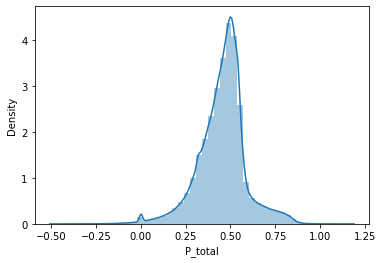

In [40]:
#payment feature distribution
sns.distplot(amx_samp["P_total"])
plt.show()

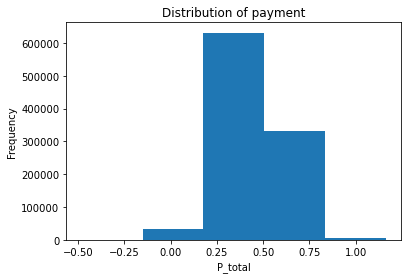

In [45]:
plt.hist(amx_samp['P_total'], bins= 5)

# add the graph title 
plt.title('Distribution of payment')

# add th x-axis label
plt.xlabel('P_total')

# # add th y-axis label
plt.ylabel('Frequency')

# display the plot
plt.show()

In [34]:
pd.crosstab(amx_samp["D_64"],amx_samp["target"])

target,0,1
D_64,,
-1,5184,1512
O,437245,89197
R,103948,47867
U,181173,94596


<AxesSubplot:xlabel='D_64'>

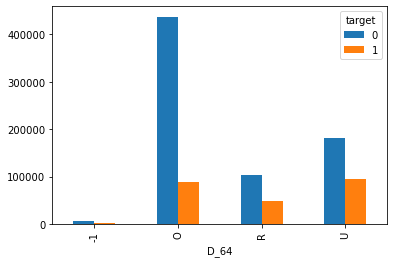

In [33]:
pd.crosstab(amx_samp["D_64"],amx_samp["target"]).plot(kind='bar')

In [35]:
pd.crosstab(amx_samp["D_63"],amx_samp["target"])

target,0,1
D_63,,
CL,55924,23038
CO,549517,195525
CR,139307,28810
XL,851,418
XM,1442,427
XZ,3779,962


<AxesSubplot:xlabel='D_63'>

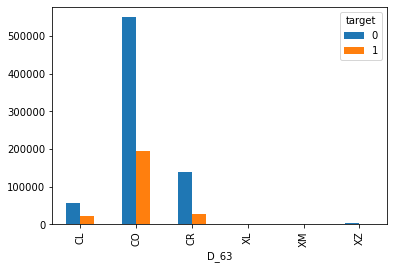

In [32]:
pd.crosstab(amx_samp["D_63"],amx_samp["target"]).plot(kind='bar')

In [38]:
import matplotlib.pyplot as plt

In [ ]:
amx_samp["S_2"]

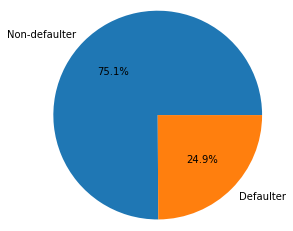

In [42]:
plt.pie(amx_samp.target.value_counts(), autopct = '%.1f%%', radius = 1.2, labels = ['Non-defaulter','Defaulter'])

# display the plot
plt.show()

In [46]:
amx_samp["S_2"].value_counts()

2018-02-17    4956
2018-01-20    4552
2017-11-18    4295
2018-02-24    4253
2018-02-03    4235
              ... 
2017-09-10    1395
2017-08-27    1379
2017-03-19    1374
2017-04-16    1305
2017-03-12    1301
Name: S_2, Length: 396, dtype: int64

In [ ]:
amx_samp["target"].value_counts()

In [47]:
amx_samp["month"]=pd.to_datetime(amx_samp["S_2"]).dt.month
amx_samp["year"]=pd.to_datetime(amx_samp["S_2"]).dt.year

In [48]:
amx_samp["year"].value_counts()

2017    754519
2018    245481
Name: year, dtype: int64

<AxesSubplot:xlabel='year'>

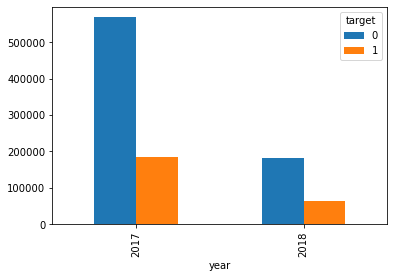

In [51]:
pd.crosstab(amx_samp["year"],amx_samp["target"]).plot(kind='bar')

In [54]:
amx_samp["D_63"].value_counts()

CO    745042
CR    168117
CL     78962
XZ      4741
XM      1869
XL      1269
Name: D_63, dtype: int64

In [ ]:
#we drop s2 variable
amx_samp.drop("S_2",axis=1,inplace=True)

In [ ]:
amx_samp["year"].value_counts()

In [ ]:
#also we can drop customer_ID
amx_samp.drop("customer_ID",axis=1,inplace=True)

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"]=[25,15]
#sns.heatmap(amx_samp[B_cols].corr(),annot=True,cmap="Blues")

In [ ]:
#drop columns where null values are more than 85%
for i in amx_samp.columns:
    if amx_samp[i].isnull().sum()*100/amx_samp.shape[0]>85:
        amx_samp.drop(i,axis=1,inplace=True)

In [ ]:
#here we create get dummies of "D_63","D_64"
amx_samp=pd.concat([amx_samp,pd.get_dummies(amx_samp[["D_63","D_64"]],drop_first=True)],axis=1)

In [ ]:
#we drop "D_63","D_64"
amx_samp.drop(["D_63","D_64"],axis=1,inplace=True)

In [ ]:
amx_samp["S_22"].head()

In [ ]:
#null values impute by ffill(),bfill()
amx_samp=amx_samp.ffill().bfill()

In [ ]:
#import statsmodels.api as sm
#amx_samp['const'] = 1
#model_t = sm.OLS(amx_samp['target'], amx_samp["S_22"])
#results = model_t.fit()
#results.summary()
#results.params[0]

In [ ]:
#now again check null values
amx_samp.isnull().sum()

In [ ]:
features=amx_samp.drop("target",axis=1)

In [ ]:
vif_drop=['P_2', 'B_1', 'B_2', 'R_1', 'S_3', 'D_46', 'D_47', 'D_48', 'B_7',
       'P_3', 'B_11', 'D_54', 'S_7', 'S_8', 'D_55', 'R_5', 'D_58', 'B_14',
       'D_61', 'B_15', 'D_62', 'B_16', 'B_18', 'D_68', 'S_15', 'B_23',
       'D_74', 'D_75', 'D_77', 'B_25', 'R_12', 'B_28', 'B_31', 'B_33',
       'S_22', 'S_24', 'S_25', 'D_103', 'D_105', 'B_37', 'R_27',
       'B_38', 'D_112', 'D_118', 'D_119', 'D_121', 'D_139', 'D_141',
       'D_143', 'year', 'D_63_CO', 'D_64_O','B_12']

In [ ]:
#amx_samp.drop(vif_drop,axis=1,inplace=True)

In [ ]:
cat_var=["D_68","B_30","B_31","B_38","D_114","D_116","D_117","D_120","D_126","target","month","year"]

In [ ]:
amx_samp[cat_var]

In [ ]:
for i in cat_var:
    q1=amx_samp[i].quantile(0.25)
    q3=amx_samp[i].quantile(0.75)
    iqr=q3-q1
    print(len(amx_samp.loc[(amx_samp[i]<(q1-1.5*iqr))|(amx_samp[i]>(q3+1.5*iqr)),i]),i)

In [ ]:
def year(i):
    if i==2017:
        return 1
    if i==2018:
        return 0
    
amx_samp["year"]=amx_samp.year.apply(year)

In [ ]:
amx_samp["year"].value_counts()

In [ ]:
amx_samp.head()
for i in amx_samp.drop(cat_var,axis=1).columns:
    q1=amx_samp[i].quantile(0.25)
    q3=amx_samp[i].quantile(0.75)
    iqr=q3-q1
    ul=(q3+1.5*iqr)
    ll=(q1-1.5*iqr)
    amx_samp.loc[(amx_samp[i]<ll),i]=ll
    amx_samp.loc[(amx_samp[i]>ul,i)]=ul

In [ ]:
for i in amx_samp.columns:
    q1=amx_samp[i].quantile(0.25)
    q3=amx_samp[i].quantile(0.75)
    iqr=q3-q1
    print(len(amx_samp.loc[(amx_samp[i]<(q1-1.5*iqr))|(amx_samp[i]>(q3+1.5*iqr)),i]),i)

In [ ]:
amx_samp["target"].value_counts()

In [ ]:
amx_samp.select_dtypes(include="object")
amx_samp.head()

b=[]
for i in amx_samp.columns:
    if (i[0]=="B"):
        b.append(i)
        
print(b)

D_cols=['D_39', 'D_41', 'D_43', 'D_44', 'D_45', 'D_50', 'D_51', 'D_52', 'D_53', 'D_56', 'D_59', 'D_60', 'D_65', 'D_69', 'D_70', 'D_71', 'D_72', 'D_78', 'D_79', 'D_80', 'D_81', 'D_82', 'D_83', 'D_84', 'D_86', 'D_89', 'D_91', 'D_92', 'D_93', 'D_94', 'D_96', 'D_102', 'D_104', 'D_107', 'D_109', 'D_113', 'D_114', 'D_115', 'D_116', 'D_117', 'D_120', 'D_122', 'D_123', 'D_124', 'D_125', 'D_126', 'D_127', 'D_128', 'D_129', 'D_130', 'D_131', 'D_133', 'D_140', 'D_142', 'D_144', 'D_145']
S_cols=['S_5', 'S_6', 'S_9', 'S_11', 'S_12', 'S_13', 'S_16', 'S_17', 'S_18', 'S_19', 'S_20', 'S_23', 'S_26', 'S_27']
R_cols=['R_2', 'R_3', 'R_4', 'R_6', 'R_7', 'R_8', 'R_10', 'R_11', 'R_13', 'R_14', 'R_15', 'R_16', 'R_17', 'R_18', 'R_19', 'R_20', 'R_21', 'R_22', 'R_23', 'R_24', 'R_25', 'R_28']
B_cols=['B_3', 'B_4', 'B_5', 'B_6', 'B_8', 'B_9', 'B_10', 'B_13', 'B_17', 'B_19', 'B_20', 'B_21', 'B_22', 'B_24', 'B_26', 'B_27', 'B_30', 'B_32', 'B_36', 'B_40', 'B_41']

amx_samp["B_total"]=amx_samp.loc[~(amx_samp["D_39"].isnull()),B_cols].sum(axis=1)
amx_samp["D_total"]=amx_samp.loc[~(amx_samp["D_39"].isnull()),D_cols].sum(axis=1)
amx_samp["S_total"]=amx_samp.loc[~(amx_samp["D_39"].isnull()),S_cols].sum(axis=1)
amx_samp["R_total"]=amx_samp.loc[~(amx_samp["D_39"].isnull()),R_cols].sum(axis=1)
    

In [81]:
train=amx_samp.iloc[:500000,:]
test1=amx_samp.iloc[500000:600000,:]
test2=amx_samp.iloc[600000:700000,:]
test3=amx_samp.iloc[700000:800000,:]
test4=amx_samp.iloc[800000:900000,:]
test5=amx_samp.iloc[900000:1000000,:]

In [82]:
xtrain=train.drop("target",axis=1)
ytrain=train["target"]
xt1=test1.drop("target",axis=1)
yt1=test1["target"]
xt2=test2.drop("target",axis=1)
yt2=test2["target"]
xt3=test3.drop("target",axis=1)
yt3=test3["target"]
xt4=test4.drop("target",axis=1)
yt4=test4["target"]
xt5=test5.drop("target",axis=1)
yt5=test5["target"]

In [ ]:
import os
os.getcwd()

In [ ]:
pip install notebook --upgrade

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [ ]:
amx_samp.shape
#import statsmodels.formula.api as sfa
#from statsmodels.stats.anova import anova_lm
#model_an = sfa.ols("P_2~target", data = amx_samp).fit()
#print(anova_lm(model_an))
#model_an.summary()
 
# feature selection
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(xtrain, ytrain)
# transform train input data
#X_train_fs = fs.transform(xtrain)
# transform test input data
#X_test_fs = fs.transform(Xtest)


In [ ]:
kbest=pd.DataFrame(fs.scores_,index=xtrain.columns).reset_index()
kbest.columns=["Feature","Importance"]
kbest.sort_values("Importance",ascending=False)

In [37]:
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm
for i in amx_samp.columns:
    if i not in cat_var:
        model_an = sfa.ols("{}~target".format(i), data = amx_samp).fit()
        if model_an.f_pvalue>0.01:
            print(i)

NameError: name 'cat_var' is not defined

In [ ]:
cat_var

In [ ]:
for i in cat_var:
    tbl = pd.crosstab(amx_samp.target, amx_samp[i])
    teststats, pvalue, df, exp_freq = stats.chi2_contingency(tbl)
    if pvalue>0.01:
        print(i)  # Insignificant columns

        #None of the categorical column is insignificant

In [ ]:
import scipy.stats as stats
for i in amx_samp.columns:
    if i not in cat_var:
        zer=amx_samp.loc[amx_samp["target"]==0,i]
        one=amx_samp.loc[amx_samp["target"]==1,i]
        if stats.ttest_ind(zer,one).pvalue>0.01:
            print(i)     # Insignificant columns
            
        # We can say with 99% confidence that "B_27","R_18","R_23","D_109","R_28" are not significant 
        #for default prediction
ttest_drop=["B_27","R_18","R_23","D_109","R_28"]
amx_samp.drop(ttest_drop,axis=1,inplace=True)
        

In [ ]:
#import statsmodels.api as sm
# building the model and fitting the data
#xtrain_c=sm.add_constant(xtrain)

#model=sm.Logit(ytrain, xtrain_c).fit()
#model.summary()
amx_samp.head()

In [ ]:
!pip install mlxtend

In [ ]:
xtrain.shape

In [ ]:
amx_samp[cat_var].head()

In [ ]:
#X=amx_samp.drop("target",axis=1)
#y=amx_samp["target"]
#from sklearn.model_selection import train_test_split
#xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=10)
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=500)
model=log.fit(xtrain,ytrain)
pred1=model.predict(xt1)
pred2=model.predict(xt2)
pred3=model.predict(xt3)
pred4=model.predict(xt4)
pred5=model.predict(xt5)
from sklearn.metrics import f1_score,classification_report, accuracy_score
#print("accuracy score",accuracy_score(ytest,pred))
print("f1 score1",f1_score(yt1,pred1))
print("f1 score2",f1_score(yt2,pred2))
print("f1 score3",f1_score(yt3,pred3))
print("f1 score4",f1_score(yt4,pred4))
print("f1 score5",f1_score(yt5,pred5))
#print("classification report",classification_report(ytest,pred))

#f1 score1 0.708376356548309
#f1 score2 0.7055648811168008
#f1 score3 0.7064084715014978
#f1 score4 0.7099032586558045
#f1 score5 0.7077046957111375

In [ ]:
#Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
model2=gnb.fit(xtrain,ytrain)
pred1=model2.predict(xt1)
pred2=model2.predict(xt2)
pred3=model2.predict(xt3)
pred4=model2.predict(xt4)
pred5=model2.predict(xt5)
from sklearn.metrics import f1_score,classification_report, accuracy_score
#print("accuracy score",accuracy_score(ytest,pred))
print("f1 score1",f1_score(yt1,pred1))
print("f1 score2",f1_score(yt2,pred2))
print("f1 score3",f1_score(yt3,pred3))
print("f1 score4",f1_score(yt4,pred4))
print("f1 score5",f1_score(yt5,pred5))
#print("classification report",classification_report(ytest,pred))

#f1 score1 0.7100557122222986
#f1 score2 0.7088541847016863
#f1 score3 0.7095274980635166
#f1 score4 0.7078073866292659
#f1 score5 0.7095657591858633

In [ ]:
#SGD classifier

from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
model3=sgd.fit(xtrain,ytrain)
pred1=model3.predict(xt1)
pred2=model3.predict(xt2)
pred3=model3.predict(xt3)
pred4=model3.predict(xt4)
pred5=model3.predict(xt5)
from sklearn.metrics import f1_score,classification_report, accuracy_score
#print("accuracy score",accuracy_score(ytest,pred))
print("f1 score1",f1_score(yt1,pred1))
print("f1 score2",f1_score(yt2,pred2))
print("f1 score3",f1_score(yt3,pred3))
print("f1 score4",f1_score(yt4,pred4))
print("f1 score5",f1_score(yt5,pred5))
#print("classification report",classification_report(ytest,pred))

#f1 score1 0.6854309720729219
#f1 score2 0.6843173594563586
#f1 score3 0.6845416876767588
#f1 score4 0.6873236953455572
#f1 score5 0.6843634442683572

# LightGBM
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
light=LGBMClassifier()
model4=light.fit(xtrain,ytrain)
pred1=model4.predict(xt1)
pred2=model4.predict(xt2)
pred3=model4.predict(xt3)
pred4=model4.predict(xt4)
pred5=model4.predict(xt5)
from sklearn.metrics import f1_score,classification_report, accuracy_score
#print("accuracy score",accuracy_score(ytest,pred))
print("f1 score1",f1_score(yt1,pred1))
print("f1 score2",f1_score(yt2,pred2))
print("f1 score3",f1_score(yt3,pred3))
print("f1 score4",f1_score(yt4,pred4))
print("f1 score5",f1_score(yt5,pred5))
#print("classification report",classification_report(ytest,pred))

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model5=rf.fit(xtrain,ytrain)
pred1=model5.predict(xt1)
pred2=model5.predict(xt2)
pred3=model5.predict(xt3)
pred4=model5.predict(xt4)
pred5=model5.predict(xt5)
from sklearn.metrics import f1_score,classification_report, accuracy_score
#print("accuracy score",accuracy_score(ytest,pred))
print("f1 score1",f1_score(yt1,pred1))
print("f1 score2",f1_score(yt2,pred2))
print("f1 score3",f1_score(yt3,pred3))
print("f1 score4",f1_score(yt4,pred4))
print("f1 score5",f1_score(yt5,pred5))
#print("classification report",classification_report(ytest,pred))

#f1 score1 0.7475657908337295
#f1 score2 0.7501380735164768
#f1 score3 0.7495251904343742
#f1 score4 0.7515404656548529
#f1 score5 0.7497940352611633


In [ ]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
plt.rcParams["figure.figsize"]=[30,20]
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': model5.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [ ]:
sns.distplot(important_features["Importance"])
#important_features.loc[important_features["Importance"]==0.000000]

In [ ]:
#Support Vector Classifier

#from sklearn import svm
#sv=svm.SVC()
#model6=sv.fit(xtrain,ytrain)
#pred1=model6.predict(xt1)
#pred2=model6.predict(xt2)
#pred3=model6.predict(xt3)
#pred4=model6.predict(xt4)
#pred5=model6.predict(xt5)
#from sklearn.metrics import f1_score,classification_report, accuracy_score
#print("accuracy score",accuracy_score(ytest,pred))
print("f1 score1",f1_score(yt1,pred1))
print("f1 score2",f1_score(yt2,pred2))
print("f1 score3",f1_score(yt3,pred3))
print("f1 score4",f1_score(yt4,pred4))
print("f1 score5",f1_score(yt5,pred5))
#print("classification report",classification_report(ytest,pred))

In [ ]:
# XGBoost

from xgboost import XGBClassifier
xgb = XGBClassifier()
model7=xgb.fit(xtrain,ytrain)
pred1=model7.predict(xt1)
pred2=model7.predict(xt2)
pred3=model7.predict(xt3)
pred4=model7.predict(xt4)
pred5=model7.predict(xt5)
from sklearn.metrics import f1_score,classification_report, accuracy_score
#print("accuracy score",accuracy_score(ytest,pred))
print("f1 score1",f1_score(yt1,pred1))
print("f1 score2",f1_score(yt2,pred2))
print("f1 score3",f1_score(yt3,pred3))
print("f1 score4",f1_score(yt4,pred4))
print("f1 score5",f1_score(yt5,pred5))
#print("classification report",classification_report(ytest,pred))

#f1 score1 0.7380570174547375
#f1 score2 0.7362520021356113
#f1 score3 0.7399008371941803
#f1 score4 0.7446739962144094
#f1 score5 0.739047235371135

In [ ]:
#amx_s["target"].isnull().sum()

In [ ]:
#amx_s.columns

In [ ]:
#check the coustomers
#len(amx_s.customer_ID.unique())

In [ ]:
#amx_s.customer_ID.unique().sum()

In [ ]:
#categorical columns
#B-Balance variables
#D-Delinquency variables
#amx_samp[['B_30', 'B_38','D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']].head(10)

In [ ]:
!pip install xgboost
import xgboost


In [55]:
!pip install lightgbm

In [57]:
!conda install lightgbm

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::jupyter==1.0.0=py39hecd8cb5_7
  - defaults/noarch::nbclassic==0.2.6=pyhd3eb1b0_0
  - defaults/osx-64::scikit-learn-intelex==2021.3.0=py39hecd8cb5_0
  - defaults/osx-64::anaconda==2021.11=py39_0
  - defaults/osx-64::_ipyw_jlab_nb_ext_conf==0.1.0=py39hecd8cb5_0
  - defaults/noarch::jupyterlab==3.2.1=pyhd3eb1b0_1
  - defaults/noarch::ipywidgets==7.6.5=pyhd3eb1b0_1
  - defaults/osx-64::widgetsnbextension==3.5.1=py39hecd8cb5_0
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done
Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::jupyter==1.0.0=py39hecd8cb5_7
  - defaults/noarch::nbclassic==0.2.6=pyhd3eb1b0_0
  - defaults/osx-64::scikit-learn-intelex==2021.3.0=py39h

Proceed ([y]/n)? ^C

CondaSystemExit: 
Operation aborted.  Exiting.



In [62]:
from catboost import CatBoostClassifier


In [60]:
!pip install xgboost

In [61]:
!pip install catboost

     |████████████████████████████████| 22.0 MB 6.7 MB/s eta 0:00:01     |██████████████████████████▏     | 18.0 MB 2.6 MB/s eta 0:00:02     |██████████████████████████████▏ | 20.7 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 15.2 MB 3.7 MB/s eta 0:00:01     |██████████████▍                 | 6.9 MB 7.5 MB/s eta 0:00:02     |███████████████████▋            | 9.3 MB 289 kB/s eta 0:00:21


In [63]:
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier